# Data Preprocessing

In [ ]:
PLAYERS_PATH = '/content/drive/MyDrive/made_ml/players.pkl'
RESULTS_PATH = '/content/drive/MyDrive/made_ml/results.pkl'
TOURNAMENTS_PATH = '/content/drive/MyDrive/made_ml/tournaments.pkl'

In [ ]:
import pandas as pd
import numpy as np
import pickle
from scipy.stats import rankdata, spearmanr, kendalltau
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [ ]:
with open(PLAYERS_PATH, 'rb') as f:
  players = pickle.load(f)

players = pd.DataFrame(players).transpose()
players.head()


id     name  patronymic    surname
1    1  Алексей        None   Абабилов
10  10    Игорь                 Абалов
11  11  Наталья     Юрьевна  Абалымова
12  12    Артур  Евгеньевич    Абальян
13  13     Эрик  Евгеньевич    Абальян

In [ ]:
len(players)

204063

In [ ]:
with open(RESULTS_PATH, 'rb') as f:
  results = pickle.load(f)


In [ ]:
results[1]

In [ ]:
with open(TOURNAMENTS_PATH, 'rb') as f:
  tournaments = pickle.load(f)

tournaments = pd.DataFrame(tournaments).transpose()
tournaments.head()

id                                name                  dateStart  \
1  1            Чемпионат Южного Кавказа  2003-07-25T00:00:00+04:00   
2  2                         Летние зори  2003-08-09T00:00:00+04:00   
3  3                    Турнир в Ижевске  2003-11-22T00:00:00+03:00   
4  4  Чемпионат Украины. Переходной этап  2003-10-11T00:00:00+04:00   
5  5                 Бостонское чаепитие  2003-10-10T00:00:00+04:00   

                     dateEnd                          type      season  \
1  2003-07-27T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/1   
2  2003-08-09T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/1   
3  2003-11-24T00:00:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   
4  2003-10-12T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   
5  2003-10-13T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   

  orgcommittee synchData questionQty  
1           []      None        None  
2           []      None        None  
3           []      None        None  
4           []      None        None  
5           []      None        None

In [ ]:
tournaments['start'] = pd.to_datetime(tournaments['dateStart'], utc=True).apply(lambda x: x.replace(tzinfo=None))
tournaments['end'] = pd.to_datetime(tournaments['dateEnd'], utc=True).apply(lambda x: x.replace(tzinfo=None))

tournaments.head()

id                                name                  dateStart  \
1  1            Чемпионат Южного Кавказа  2003-07-25T00:00:00+04:00   
2  2                         Летние зори  2003-08-09T00:00:00+04:00   
3  3                    Турнир в Ижевске  2003-11-22T00:00:00+03:00   
4  4  Чемпионат Украины. Переходной этап  2003-10-11T00:00:00+04:00   
5  5                 Бостонское чаепитие  2003-10-10T00:00:00+04:00   

                     dateEnd                          type      season  \
1  2003-07-27T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/1   
2  2003-08-09T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/1   
3  2003-11-24T00:00:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   
4  2003-10-12T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   
5  2003-10-13T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   

  orgcommittee synchData questionQty               start                 end  
1           []      None        None 2003-07-24 20:00:00 2003-07-26 20:00:00  
2           []      None        None 2003-08-08 20:00:00 2003-08-08 20:00:00  
3           []      None        None 2003-11-21 21:00:00 2003-11-23 21:00:00  
4           []      None        None 2003-10-10 20:00:00 2003-10-11 20:00:00  
5           []      None        None 2003-10-09 20:00:00 2003-10-12 20:00:00

In [ ]:
from datetime import datetime

In [ ]:
tournaments_train = tournaments[(datetime(2020, 1, 1, 0, 0, 0) > tournaments.start) &
                                (tournaments.start >= datetime(2019, 1, 1, 0, 0, 0))]
tournaments_test = tournaments[(datetime(2021, 1, 1, 0, 0, 0) > tournaments.start) & 
                               (tournaments.start >= datetime(2020, 1, 1, 0, 0, 0))]

In [ ]:
assert len(np.intersect1d(tournaments_train['id'], tournaments_test['id'])) == 0

In [ ]:
tournaments_train['id'][:10]

4772    4772
4973    4973
4974    4974
4975    4975
4986    4986
5000    5000
5008    5008
5009    5009
5010    5010
5011    5011
Name: id, dtype: object

In [ ]:
results_train = {id: results[id] for id in tournaments_train['id']}
results_test = {id: results[id] for id in tournaments_test['id']}

In [ ]:
results_train[4772][3]['mask']

'101111101111111110001101011001111010'

In [ ]:
id_to_del = set([])
for id in results_train:
  if len(results_train[id]) == 0:
    id_to_del.add(id)
    continue
  for command in results_train[id]:
    if (command.get('mask', -1) == -1) or (command['mask'] is None) or len(command['teamMembers']) == 0:
      id_to_del.add(id)
      continue

In [ ]:
len(id_to_del), len(results_train)

(38, 689)

In [ ]:
for id in id_to_del:
  results_train.pop(id)

tournaments_train.drop(index=id_to_del, inplace=True)

In [ ]:
len(results_train), len(tournaments_train)

(651, 651)

In [ ]:
id_to_del = set([])
for id in results_test:
  if len(results_test[id]) == 0:
    id_to_del.add(id)
    continue
  for command in results_test[id]:
    if (command.get('mask', -1) == -1) or (command['mask'] is None) or len(command['teamMembers']) == 0:
      id_to_del.add(id)
      continue

len(id_to_del), len(results_test)     

(0, 160)

In [ ]:
for id in id_to_del:
  results_test.pop(id)

tournaments_test.drop(index=id_to_del, inplace=True)

C:\Users\anke\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
len(results_test), len(tournaments_test)

(163, 163)

In [ ]:
tournaments_train.drop(columns=['dateStart', 'dateEnd', 'season', 'orgcommittee', 'synchData'], inplace=True)
tournaments_train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


id                                   name  \
4772  4772  Синхрон северных стран. Зимний выпуск   
4973  4973               Балтийский Берег. 3 игра   
4974  4974               Балтийский Берег. 4 игра   
4975  4975               Балтийский Берег. 5 игра   
5000  5000                            Чёрная Быль   

                              type                  questionQty  \
4772  {'id': 3, 'name': 'Синхрон'}  {'1': 12, '2': 12, '3': 12}   
4973  {'id': 3, 'name': 'Синхрон'}  {'1': 12, '2': 12, '3': 12}   
4974  {'id': 3, 'name': 'Синхрон'}  {'1': 12, '2': 12, '3': 12}   
4975  {'id': 3, 'name': 'Синхрон'}  {'1': 12, '2': 12, '3': 12}   
5000  {'id': 3, 'name': 'Синхрон'}  {'1': 12, '2': 12, '3': 12}   

                   start                 end  
4772 2019-01-05 16:00:00 2019-01-09 16:00:00  
4973 2019-01-25 16:05:00 2019-01-29 16:00:00  
4974 2019-03-01 16:05:00 2019-03-05 16:00:00  
4975 2019-04-05 16:05:00 2019-04-09 16:00:00  
5000 2019-04-26 15:00:00 2019-04-30 15:00:00

In [ ]:
pd.DataFrame(results_train[4772])

team  \
0    {'id': 45556, 'name': 'Рабочее название', 'tow...   
1    {'id': 1030, 'name': 'Сборная Бутана', 'town':...   
2    {'id': 4252, 'name': 'Ять', 'town': {'id': 197...   
3    {'id': 5444, 'name': 'Эйфью', 'town': {'id': 1...   
4    {'id': 40931, 'name': 'Здоровенный Я', 'town':...   
..                                                 ...   
226  {'id': 7591, 'name': 'Берлин Мумбай', 'town': ...   
227  {'id': 48932, 'name': 'Не стоит!', 'town': {'i...   
228  {'id': 65394, 'name': 'Совы - не то', 'town': ...   
229  {'id': 68886, 'name': 'IMBA', 'town': {'id': 2...   
230  {'id': 68319, 'name': 'Альфа-самцы', 'town': {...   

                                     mask  \
0    111111111011111110111111111100010010   
1    111111111011110100101111011001011010   
2    111111111011110101101111001011110000   
3    101111101111111110001101011001111010   
4    111111101011111101000111001001111110   
..                                    ...   
226  110000000001110000000000000000100000   
227  100010100001100000001000000000000000   
228  101010000000100000001000001000000000   
229  100000000000100100001000000001100000   
230  100000100000100000001000000000000000   

                                               current  questionsTotal  \
0    {'name': 'Рабочее название', 'town': {'id': 28...              28   
1    {'name': 'Сборная Бутана', 'town': {'id': 346,...              25   
2    {'name': 'Ять', 'town': {'id': 197, 'name': 'М...              25   
3    {'name': 'Эйфью', 'town': {'id': 197, 'name': ...              25   
4    {'name': 'Здоровенный Я', 'town': {'id': 201, ...              25   
..                                                 ...             ...   
226  {'name': 'Берлин Мумбай', 'town': {'id': 311, ...               6   
227  {'name': 'Не стоит!', 'town': {'id': 46, 'name...               6   
228  {'name': 'Совы - не то', 'town': {'id': 236, '...               6   
229  {'name': 'IMBA', 'town': {'id': 236, 'name': '...               6   
230  {'name': 'Буйвол надежды', 'town': {'id': 201,...               4   

                                          synchRequest  position  \
0    {'id': 56392, 'venue': {'id': 3030, 'name': 'С...       1.0   
1    {'id': 56690, 'venue': {'id': 3151, 'name': 'У...       5.5   
2    {'id': 56814, 'venue': {'id': 3112, 'name': 'М...       5.5   
3    {'id': 56814, 'venue': {'id': 3112, 'name': 'М...       5.5   
4    {'id': 55460, 'venue': {'id': 3117, 'name': 'М...       5.5   
..                                                 ...       ...   
226  {'id': 56885, 'venue': {'id': 3149, 'name': 'С...     228.5   
227  {'id': 56611, 'venue': {'id': 3240, 'name': 'Б...     228.5   
228  {'id': 56557, 'venue': {'id': 3134, 'name': 'О...     228.5   
229  {'id': 56557, 'venue': {'id': 3134, 'name': 'О...     228.5   
230  {'id': 55460, 'venue': {'id': 3117, 'name': 'М...     231.0   

                                        controversials flags  \
0    [{'id': 91169, 'questionNumber': 15, 'answer':...    []   
1                                                   []    []   
2    [{'id': 91164, 'questionNumber': 33, 'answer':...    []   
3                                                   []    []   
4                                                   []    []   
..                                                 ...   ...   
226                                                 []    []   
227  [{'id': 91181, 'questionNumber': 8, 'answer': ...    []   
228  [{'id': 91146, 'questionNumber': 2, 'answer': ...    []   
229  [{'id': 91146, 'questionNumber': 2, 'answer': ...    []   
230                                                 []    []   

                                           teamMembers  
0    [{'flag': 'Б', 'usedRating': 13507, 'rating': ...  
1    [{'flag': None, 'usedRating': 13058, 'rating':...  
2    [{'flag': 'К', 'usedRating': 9584, 'rating': 9...  
3    [{'flag': 'Л', 'usedRating': 8592, 'rating': 8...  
4    [{'flag': 'Л', 'usedRating': 12069, 'rating': .

In [ ]:
results_train[4772][0].keys()

dict_keys(['team', 'mask', 'current', 'questionsTotal', 'synchRequest', 'position', 'controversials', 'flags', 'teamMembers'])

In [ ]:
results_train[4772][0]['team']

{'id': 45556,
 'name': 'Рабочее название',
 'town': {'id': 285, 'name': 'Санкт-Петербург'}}

In [ ]:
results_train[4772][2]['current']

{'name': 'Ять', 'town': {'id': 197, 'name': 'Минск'}}

In [ ]:
results_train[4772][2]['synchRequest']

{'id': 56814, 'venue': {'id': 3112, 'name': 'Минск'}}

In [ ]:
results_train[4772][2]['controversials']

[{'answer': 'зеркала',
  'appealJuryComment': None,
  'comment': "Версия хорошая, но может быть принята за попытку 'накрыть' в том числе маяк. Сожалеем, что вопросом это никак не отсечено.",
  'id': 91164,
  'issuedAt': '2019-01-06T03:23:50+03:00',
  'questionNumber': 33,
  'resolvedAt': '2019-01-06T10:29:13+03:00',
  'status': 'D'}]

In [ ]:
results_train[4772][2]['flags']

[]

In [ ]:
results_train[4772][2]['teamMembers']

[{'flag': 'К',
  'player': {'id': 23513,
   'name': 'Мария',
   'patronymic': 'Юрьевна',
   'surname': 'Орановская-Малецкая'},
  'rating': 9584,
  'usedRating': 9584},
 {'flag': 'Б',
  'player': {'id': 18168,
   'name': 'Надежда',
   'patronymic': 'Вячеславовна',
   'surname': 'Лейчинская'},
  'rating': 9437,
  'usedRating': 7864},
 {'flag': 'Б',
  'player': {'id': 21060,
   'name': 'Павел',
   'patronymic': 'Владимирович',
   'surname': 'Митар'},
  'rating': 9358,
  'usedRating': 6239},
 {'flag': 'Б',
  'player': {'id': 35850,
   'name': 'Антон',
   'patronymic': 'Дмитриевич',
   'surname': 'Шевцов'},
  'rating': 9306,
  'usedRating': 4653},
 {'flag': 'Б',
  'player': {'id': 31332,
   'name': 'Александра',
   'patronymic': 'Георгиевна',
   'surname': 'Татаринова'},
  'rating': 8571,
  'usedRating': 2857},
 {'flag': 'Л',
  'player': {'id': 10187,
   'name': 'Константин',
   'patronymic': 'Александрович',
   'surname': 'Егиазаров'},
  'rating': 6539,
  'usedRating': 1090}]

In [ ]:
results_train_df = {id: pd.DataFrame(results_train[id]) for id in results_train}

In [ ]:
results_train_df[4772].head()

mask  position  \
0  111111111011111110111111111100010010       1.0   
1  111111111011110100101111011001011010       5.5   
2  111111111011110101101111001011110000       5.5   
3  101111101111111110001101011001111010       5.5   
4  111111101011111101000111001001111110       5.5   

                                  teamMembers  
0   [6212, 18332, 18036, 22799, 15456, 26089]  
1           [1585, 40840, 1584, 10998, 16206]  
2  [23513, 18168, 21060, 35850, 31332, 10187]  
3         [36742, 28939, 54289, 15381, 27375]  
4  [28689, 17720, 30597, 12400, 26988, 69476]

In [ ]:
types = {}
for tour in tournaments_train['type']:
  types[tour['id']] = tour['name']


In [ ]:
types

{3: 'Синхрон', 8: 'Асинхрон', 2: 'Обычный', 6: 'Строго синхронный'}

In [ ]:
tournaments_train[tournaments_train['type'] == {'id': 2, 'name': 'Обычный'}]

id                                      name  \
5042  5042          Студенческий Кубок княгини Ольги   
5111  5111                  Открытый чемпионат Кипра   
5112  5112                         Mediterranean Cup   
5155  5155           Студенческий чемпионат Беларуси   
5185  5185    Игра Первопрестольной. Четвёртый сезон   
...    ...                                       ...   
6150  6150   Чемпионат Санкт-Петербурга. Высшая лига   
6161  6161  Студенческий чемпионат Тюменской области   
6170  6170   Открытый чемпионат Белгородской области   
6173  6173                         Кубок Мэра Казани   
6191  6191   Всеармянский Интеллектуальный Фестиваль   

                      dateStart                    dateEnd  \
5042  2019-03-30T12:00:00+03:00  2019-03-31T16:00:00+03:00   
5111  2019-03-08T19:00:00+03:00  2019-03-10T22:00:00+03:00   
5112  2019-10-18T19:00:00+03:00  2019-10-20T13:00:00+03:00   
5155  2019-05-05T12:00:00+03:00  2019-05-06T16:30:00+03:00   
5185  2019-06-01T12:30:00+03:00  2019-06-02T16:30:00+03:00   
...                         ...                        ...   
6150  2019-10-13T00:00:00+03:00  2019-12-01T15:00:00+03:00   
6161  2019-12-22T12:30:00+03:00  2019-12-22T18:30:00+03:00   
6170  2019-12-14T13:00:00+03:00  2019-12-14T18:00:00+03:00   
6173  2019-12-15T10:00:00+03:00  2019-12-15T15:00:00+03:00   
6191  2019-12-22T12:00:00+03:00  2019-12-22T16:00:00+03:00   

                              type       season  \
5042  {'id': 2, 'name': 'Обычный'}  /seasons/52   
5111  {'id': 2, 'name': 'Обычный'}  /seasons/52   
5112  {'id': 2, 'name': 'Обычный'}  /seasons/53   
5155  {'id': 2, 'name': 'Обычный'}  /seasons/52   
5185  {'id': 2, 'name': 'Обычный'}  /seasons/52   
...                            ...          ...   
6150  {'id': 2, 'name': 'Обычный'}  /seasons/53   
6161  {'id': 2, 'name': 'Обычный'}  /seasons/53   
6170  {'id': 2, 'name': 'Обычный'}  /seasons/53   
6173  {'id': 2, 'name': 'Обычный'}  /seasons/53   
6191  {'id': 2, 'name': 'Обычный'}  /seasons/53   

                                           orgcommittee synchData  \
5042  [{'id': 40393, 'name': 'Юрий', 'patronymic': '...      None   
5111  [{'id': 55040, 'name': 'Владимир', 'patronymic...      None   
5112  [{'id': 55044, 'name': 'Светлана', 'patronymic...      None   
5155  [{'id': 53126, 'name': 'Василий', 'patronymic'...      None   
5185  [{'id': 46339, 'name': 'Антон', 'patronymic': ...      None   
...                                                 ...       ...   
6150  [{'id': 26469, 'name': 'Алексей', 'patronymic'...      None   
6161  [{'id': 102719, 'name': 'Олег', 'patronymic': ...      None   
6170  [{'id': 84511, 'name': 'Дмитрий', 'patronymic'...      None   
6173  [{'id': 33624, 'name': 'Ренат', 'patronymic': ...      None   
6191  [{'id': 19981, 'name': 'Сейран', 'patronymic':...      None   

                                            questionQty               start  \
5042  {'1': 12, '2': 12, '3': 12, '4': 12, '5': 12, ... 2019-03-30 09:00:00   
5111                        {'1': 15, '2': 15, '3': 15} 2019-03-08 16:00:00   
5112               {'1': 15, '2': 15, '3': 15, '4': 15} 2019-10-18 16:00:00   
5155      {'1': 15, '2': 15, '3': 15, '4': 15, '5': 15} 2019-05-05 09:00:00   
5185  {'1': 15, '2': 15, '3': 15, '4': 15, '5': 15, ... 2019-06-01 09:30:00   
...                                                 ...                 ...   
6150  {'1': 15, '2': 15, '3': 15, '4': 15, '5': 15, ... 2019-10-12 21:00:00   
6161                        {'1': 15, '2': 15, '3': 15} 2019-12-22 09:30:00   
6170               {'1': 12, '2': 12, '3': 12, '4': 12} 2019-12-14 10:00:00   
6173               {'1': 15, '2': 15, '3': 15, '4': 15} 2019-12-15 07:00:00   
6191                        {'1': 12, '2': 12, '3': 12} 2019-12-22 09:00:00   

                     end  
5042 2019-03-31 13:00:00  
5111 2019-03-10 19:00:00  
5112 2019-10-20 10:00:00  
5155 2019-05-06 13:30:00  
5185 2019-06-02 13:30:00  
...                  ...  
6150 2019-

In [ ]:
results_train_df[5042].head()

team  \
0  {'id': 58596, 'name': 'Аутята', 'town': {'id':...   
1  {'id': 55517, 'name': 'Das Gemeine', 'town': {...   
2  {'id': 55655, 'name': 'Во вторник сможем', 'to...   
3  {'id': 65823, 'name': 'Акацуки', 'town': {'id'...   
4  {'id': 56211, 'name': 'Дефект бабочки', 'town'...   

                                                mask  \
0  1110110111111001111110111110101111011111101011...   
1  1110100011011011101010101010100111011101101010...   
2  1111001010011001110010000010101001000001011111...   
3  1011001001011011110010001010100101001011001110...   
4  1111101001001000001010111110010011101001000110...   

                                             current  questionsTotal  \
0  {'name': 'Гвоздь вообще', 'town': {'id': 201, ...              51   
1  {'name': 'Das Gemeine', 'town': {'id': 285, 'n...              45   
2  {'name': 'Во вторник сможем', 'town': {'id': 2...              37   
3  {'name': 'Акацуки', 'town': {'id': 139, 'name'...              36   
4  {'name': 'Дефект бабочки', 'town': {'id': 201,...              35   

  synchRequest  position controversials  \
0         None       1.0             []   
1         None       2.0             []   
2         None       3.0             []   
3         None       4.0             []   
4         None       5.5             []   

                                               flags  \
0  [{'id': 4, 'shortName': 'С', 'longName': 'Студ...   
1  [{'id': 4, 'shortName': 'С', 'longName': 'Студ...   
2  [{'id': 4, 'shortName': 'С', 'longName': 'Студ...   
3  [{'id': 4, 'shortName': 'С', 'longName': 'Студ...   
4  [{'id': 4, 'shortName': 'С', 'longName': 'Студ...   

                                         teamMembers     type  
0  [{'flag': 'Л', 'usedRating': 12408, 'rating': ...  Обычный  
1  [{'flag': 'Л', 'usedRating': 10990, 'rating': ...  Обычный  
2  [{'flag': 'Б', 'usedRating': 11329, 'rating': ...  Обычный  
3  [{'flag': 'Л', 'usedRating': 10690, 'rating': ...  Обычный  
4  [{'flag': 'Б', 'usedRating': 7527, 'rating': 7...  Обычный

In [ ]:
for idx in results_train_df:
  results_train_df[idx]['type'] = tournaments_train.loc[idx]['type']['id']

results_train_df[4772].head()

mask  position  \
0  111111111011111110111111111100010010       1.0   
1  111111111011110100101111011001011010       5.5   
2  111111111011110101101111001011110000       5.5   
3  101111101111111110001101011001111010       5.5   
4  111111101011111101000111001001111110       5.5   

                                  teamMembers  type  
0   [6212, 18332, 18036, 22799, 15456, 26089]     3  
1           [1585, 40840, 1584, 10998, 16206]     3  
2  [23513, 18168, 21060, 35850, 31332, 10187]     3  
3         [36742, 28939, 54289, 15381, 27375]     3  
4  [28689, 17720, 30597, 12400, 26988, 69476]     3

In [ ]:
tournaments_train['name'].unique()

array(['Синхрон северных стран. Зимний выпуск',
       'Балтийский Берег. 3 игра', 'Балтийский Берег. 4 игра',
       'Балтийский Берег. 5 игра', 'Чёрная Быль',
       'Школьный Синхрон-lite. Выпуск 2.3',
       '(а)Синхрон-lite. Лига старта. Эпизод III',
       'Школьный Синхрон-lite. Выпуск 2.4',
       '(а)Синхрон-lite. Лига старта. Эпизод IV',
       'Школьный Синхрон-lite. Выпуск 2.5',
       '(а)Синхрон-lite. Лига старта. Эпизод V',
       'Синхрон-lite. Выпуск XXII', 'Кубок городов',
       'Студенческий Кубок княгини Ольги',
       'Молодёжный кубок Европы. Этап 1',
       'Молодёжный кубок Европы. Этап 2', 'Пятая октава: Тропик Козерога',
       'Седьмая октава: Кубок Равноденствия', 'Шестая октава: СИ-Мажор',
       'Октавы: Гала-турнир', 'Восьмая октава: Кода да Винчи',
       'Синхрон-lite. Выпуск XXIV. Special edition', 'Синхрон Моносова',
       'Синхрон-lite. Выпуск XXV', 'Ускользающая сова',
       'Самая лёгкая лодка в мире', 'Ра-II: синхрон "Борского корабела"',
     

In [ ]:
def make_types(name):
  res = ''
  if name.lower().find('чемпионат') != -1:
    res = 'чемп'
  elif name.lower().find('студ') != -1:
    res = 'студ'
  elif name.lower().find('кубок') != -1:
    res = 'кубок'
  elif name.lower().find('lite') != -1:
    res = 'lite'
  else:
    res = 'other'
  return res 

In [ ]:
tournaments_train['class'] = tournaments_train['name'].apply(make_types)
tournaments_test['class'] = tournaments_test['name'].apply(make_types)
tournaments_train.head(20)

C:\Users\anke\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anke\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id                                      name  \
4772  4772     Синхрон северных стран. Зимний выпуск   
4973  4973                  Балтийский Берег. 3 игра   
4974  4974                  Балтийский Берег. 4 игра   
4975  4975                  Балтийский Берег. 5 игра   
5000  5000                               Чёрная Быль   
5008  5008         Школьный Синхрон-lite. Выпуск 2.3   
5009  5009  (а)Синхрон-lite. Лига старта. Эпизод III   
5010  5010         Школьный Синхрон-lite. Выпуск 2.4   
5011  5011   (а)Синхрон-lite. Лига старта. Эпизод IV   
5012  5012         Школьный Синхрон-lite. Выпуск 2.5   
5013  5013    (а)Синхрон-lite. Лига старта. Эпизод V   
5021  5021                 Синхрон-lite. Выпуск XXII   
5025  5025                             Кубок городов   
5042  5042          Студенческий Кубок княгини Ольги   
5052  5052           Молодёжный кубок Европы. Этап 1   
5053  5053           Молодёжный кубок Европы. Этап 2   
5055  5055             Пятая октава: Тропик Козерога   
5056  5056       Седьмая октава: Кубок Равноденствия   
5060  5060                   Шестая октава: СИ-Мажор   
5061  5061                       Октавы: Гала-турнир   

                      dateStart                    dateEnd  \
4772  2019-01-05T19:00:00+03:00  2019-01-09T19:00:00+03:00   
4973  2019-01-25T19:05:00+03:00  2019-01-29T19:00:00+03:00   
4974  2019-03-01T19:05:00+03:00  2019-03-05T19:00:00+03:00   
4975  2019-04-05T19:05:00+03:00  2019-04-09T19:00:00+03:00   
5000  2019-04-26T18:00:00+03:00  2019-04-30T18:00:00+03:00   
5008  2019-01-25T14:00:00+03:00  2019-02-25T23:55:00+03:00   
5009  2019-01-25T14:00:00+03:00  2019-02-25T23:55:00+03:00   
5010  2019-03-01T12:00:00+03:00  2019-03-31T23:55:00+03:00   
5011  2019-03-01T12:00:00+03:00  2019-03-31T23:55:00+03:00   
5012  2019-04-05T12:00:00+03:00  2019-05-05T23:55:00+03:00   
5013  2019-04-05T12:00:00+03:00  2019-05-05T23:55:00+03:00   
5021  2019-02-08T18:55:00+03:00  2019-02-12T18:55:00+03:00   
5025  2019-03-29T19:00:00+03:00  2019-04-01T23:55:00+03:00   
5042  2019-03-30T12:00:00+03:00  2019-03-31T16:00:00+03:00   
5052  2019-02-22T19:00:00+03:00  2019-02-26T19:00:00+03:00   
5053  2019-05-24T19:00:00+03:00  2019-05-28T19:00:00+03:00   
5055  2019-01-11T20:00:00+03:00  2019-01-15T20:00:00+03:00   
5056  2019-03-22T20:00:00+03:00  2019-03-26T20:00:00+03:00   
5060  2019-02-22T20:00:00+03:00  2019-02-26T20:00:00+03:00   
5061  2019-05-11T15:00:00+03:00  2019-05-15T15:00:00+03:00   

                               type       season  \
4772   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
4973   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
4974   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
4975   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5000   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5008  {'id': 8, 'name': 'Асинхрон'}  /seasons/52   
5009  {'id': 8, 'name': 'Асинхрон'}  /seasons/52   
5010  {'id': 8, 'name': 'Асинхрон'}  /seasons/52   
5011  {'id': 8, 'name': 'Асинхрон'}  /seasons/52   
5012  {'id': 8, 'name': 'Асинхрон'}  /seasons/52   
5013  {'id': 8, 'name': 'Асинхрон'}  /seasons/52   
5021   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5025   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5042   {'id': 2, 'name': 'Обычный'}  /seasons/52   
5052   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5053   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5055   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5056   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5060   {'id': 3, 'name': 'Синхрон'}  /seasons/52   
5061   {'id': 3, 'name': 'Синхрон'}  /seasons/52   

                                           orgcommittee  \
4772  [{'id': 28379, 'name': 'Константин', 'patronym...   
4973  [{'id': 23030, 'name': 'Марина', 'patronymic':...   
4974  [{'id': 23030, 'name': 'Марина', 'patronymic':...   
4975  [{'id': 23030, 'name': 'Марина', 'patronymic':...   
5000  [{'id': 59436, 'name': 'Олег', 'patronymic': '...   
5008  [{'id': 23740, 'name': 'Владимир', 'patronymic...   
5009  [{'id': 23740, '

In [ ]:
for idx in results_train_df:
  results_train_df[idx]['class'] = tournaments_train.loc[idx]['class']

results_train_df[4772].head()

mask  position  \
0  111111111011111110111111111100010010       1.0   
1  111111111011110100101111011001011010       5.5   
2  111111111011110101101111001011110000       5.5   
3  101111101111111110001101011001111010       5.5   
4  111111101011111101000111001001111110       5.5   

                                  teamMembers  type  class  
0   [6212, 18332, 18036, 22799, 15456, 26089]     3  other  
1           [1585, 40840, 1584, 10998, 16206]     3  other  
2  [23513, 18168, 21060, 35850, 31332, 10187]     3  other  
3         [36742, 28939, 54289, 15381, 27375]     3  other  
4  [28689, 17720, 30597, 12400, 26988, 69476]     3  other

In [ ]:
def shorten_players_info(teamMembers):
  res = {member['player']['id']: member['rating'] for member in teamMembers}
  return res

In [ ]:
cols_to_del = ['current', 'flags', 'controversials', 'synchRequest']
for id in results_train_df:
  df = results_train_df[id]
  df.drop(columns=cols_to_del, inplace=True)
  df['team'] = df['team'].apply(lambda x: x['id'])
  df['teamMembers'] = df['teamMembers'].apply(shorten_players_info)

In [ ]:
results_train_df[4772].head()

team                                  mask  questionsTotal  position  \
0  45556  111111111011111110111111111100010010              28       1.0   
1   1030  111111111011110100101111011001011010              25       5.5   
2   4252  111111111011110101101111001011110000              25       5.5   
3   5444  101111101111111110001101011001111010              25       5.5   
4  40931  111111101011111101000111001001111110              25       5.5   

                                         teamMembers     type  
0  {6212: 13507, 18332: 13185, 18036: 12801, 2279...  Синхрон  
1  {1585: 13058, 40840: 9138, 1584: 9030, 10998: ...  Синхрон  
2  {23513: 9584, 18168: 9437, 21060: 9358, 35850:...  Синхрон  
3  {36742: 8592, 28939: 8258, 54289: 7995, 15381:...  Синхрон  
4  {28689: 12069, 17720: 9712, 30597: 8717, 12400...  Синхрон

In [ ]:
tournaments_test.drop(columns=['dateStart', 'dateEnd', 'season', 'orgcommittee', 'synchData'], inplace=True)
tournaments_test.head()

C:\Users\anke\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


id                                               name  \
4957  4957                                 Синхрон Биркиркары   
5414  5414                             Синхрон северных стран   
5708  5708           (а)Синхрон-lite. Лига старта. Эпизод XII   
5711  5711  Онлайн: (а)Синхрон-lite. Лига старта. Эпизод XIII   
5712  5712                  Школьный Синхрон-lite. Выпуск 3.8   

                               type                  questionQty  \
4957   {'id': 3, 'name': 'Синхрон'}  {'1': 13, '2': 13, '3': 13}   
5414   {'id': 3, 'name': 'Синхрон'}  {'1': 12, '2': 12, '3': 12}   
5708  {'id': 8, 'name': 'Асинхрон'}  {'1': 12, '2': 12, '3': 12}   
5711  {'id': 8, 'name': 'Асинхрон'}  {'1': 12, '2': 12, '3': 12}   
5712  {'id': 8, 'name': 'Асинхрон'}  {'1': 12, '2': 12, '3': 12}   

                   start                 end  class  
4957 2020-02-20 21:00:00 2020-02-27 20:00:00  other  
5414 2020-01-03 16:00:00 2020-01-10 16:00:00  other  
5708 2020-01-31 21:05:00 2020-03-09 20:55:00   lite  
5711 2020-02-29 21:05:00 2020-04-12 20:59:00   lite  
5712 2020-03-31 21:05:00 2020-04-30 20:55:00   lite

In [ ]:
results_test_df = {id: pd.DataFrame(results_test[id]) for id in results_test}

In [ ]:
results_test_df.keys()

dict_keys([4957, 5414, 5708, 5711, 5712, 5713, 5719, 5730, 5731, 5732, 5746, 5753, 5754, 5787, 5793, 5798, 5799, 5804, 5806, 5809, 5810, 5813, 5823, 5846, 5848, 5849, 5856, 5889, 5891, 5923, 5925, 5958, 5962, 5968, 5970, 5973, 6002, 6004, 6016, 6019, 6020, 6041, 6042, 6045, 6046, 6059, 6064, 6067, 6070, 6073, 6075, 6076, 6083, 6093, 6095, 6096, 6108, 6109, 6111, 6121, 6124, 6132, 6133, 6134, 6139, 6142, 6160, 6162, 6163, 6165, 6166, 6171, 6176, 6177, 6180, 6181, 6182, 6184, 6185, 6186, 6187, 6188, 6190, 6193, 6196, 6197, 6198, 6199, 6200, 6201, 6202, 6204, 6205, 6207, 6208, 6211, 6212, 6213, 6215, 6216, 6217, 6218, 6220, 6221, 6222, 6223, 6225, 6227, 6228, 6229, 6230, 6233, 6234, 6237, 6239, 6244, 6245, 6246, 6247, 6250, 6256, 6257, 6259, 6260, 6261, 6262, 6263, 6265, 6269, 6270, 6271, 6272, 6277, 6284, 6285, 6292, 6293, 6295, 6296, 6298, 6299, 6301, 6307, 6308, 6313, 6314, 6317, 6320, 6323, 6325, 6330, 6331, 6339, 6340, 6342, 6362, 6405, 6409, 6410, 6428, 6437, 6438, 6456])

In [ ]:
for idx in results_test_df:
  results_test_df[idx]['type'] = tournaments_test.loc[idx]['type']['id']

In [ ]:
for idx in results_test_df:
  results_test_df[idx]['class'] = tournaments_test.loc[idx]['class']

results_test_df[4957].head()

mask  position  \
0  111111011111110110X11101111000101010001       1.0   
1  101111011111110100X00111111011100010100       2.0   
2  101110101011010000X11111111110100000111       3.0   
3  111101001110010110X11011111100000000111       4.0   
4  001110000011110111X01011111000100010111       5.5   

                                    teamMembers  type  class  
0     [30152, 30270, 27822, 28751, 27403, 4270]     3  other  
1  [34936, 40877, 25177, 113703, 33792, 107161]     3  other  
2    [33620, 21346, 13857, 46339, 37836, 19632]     3  other  
3     [32901, 28689, 19541, 13689, 9801, 18194]     3  other  
4     [6482, 34846, 36120, 32458, 25882, 30475]     3  other

In [ ]:
cols_to_del = ['current', 'flags', 'controversials', 'synchRequest']
for id in results_test_df:
  df = results_test_df[id]
  df.drop(columns=cols_to_del, inplace=True)
  df['team'] = df['team'].apply(lambda x: x['id'])
  df['teamMembers'] = df['teamMembers'].apply(shorten_players_info)

In [ ]:
results_test_df[4957].head()

team                                     mask  questionsTotal  position  \
0  49804  111111011111110110X11101111000101010001              26       1.0   
1   4109  101111011111110100X00111111011100010100              24       2.0   
2   3875  101110101011010000X11111111110100000111              23       3.0   
3  77418  111101001110010110X11011111100000000111              22       4.0   
4      2  001110000011110111X01011111000100010111              21       5.5   

                                         teamMembers     type  
0  {30152: 14433, 30270: 14374, 27822: 14348, 287...  Синхрон  
1  {34936: 13475, 40877: 13213, 25177: 12966, 113...  Синхрон  
2  {33620: 13990, 21346: 12141, 13857: 11664, 463...  Синхрон  
3  {32901: 13971, 28689: 13907, 19541: 13387, 136...  Синхрон  
4  {6482: 14091, 34846: 13918, 36120: 13831, 3245...  Синхрон

In [ ]:
types_test = {}
for tour in tournaments_test['type']:
  types_test[tour['id']] = tour['id']

types_test

{3: 3, 8: 8, 2: 2, 6: 6}

In [ ]:
tournaments_test[tournaments_test['type'] == {'id': 5, 'name': 'Общий зачёт'}]

Empty DataFrame
Columns: [id, name, type, questionQty, start, end, class]
Index: []

In [ ]:
results_test_df[6265].head()

team                                               mask  questionsTotal  \
0  53714  1111100100100111011101000110001111101001110100...             105   
1  59419  0101001110100111000100000110011111011011110101...              91   
2  38164  1101101010100101101011001110000111001011110100...              89   
3  48762  1111100000100110011100000000000000100100000101...              84   
4  66120  0111101010001011110110001010001111111001110101...              79   

   position                                        teamMembers         type  
0       1.0  {4121: 0, 5104: 0, 6212: 0, 12313: 0, 27499: 0...  Общий зачёт  
1       2.0  {41623: 0, 94420: 0, 97087: 0, 103214: 0, 1040...  Общий зачёт  
2       3.0  {14785: 0, 24603: 0, 37646: 0, 44978: 0, 59326...  Общий зачёт  
3       4.0  {62239: 0, 70768: 0, 85059: 0, 126333: 0, 1330...  Общий зачёт  
4       5.0  {8532: 0, 12773: 0, 18490: 0, 22457: 0, 22482:...  Общий зачёт

In [ ]:
id_to_del = tournaments_test[tournaments_test['type'] == {'id': 5, 'name': 'Общий зачёт'}]['id']
id_to_del

6265    6265
6307    6307
6308    6308
Name: id, dtype: object

In [ ]:
for id in id_to_del:
  results_test_df.pop(id)

tournaments_test.drop(index=id_to_del, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
for id in results_train_df:
  results_train_df[id]['teamSize'] = results_train_df[id]['teamMembers'].apply(lambda x: len(x))

results_train_df[4772].head()

mask  position  \
0  111111111011111110111111111100010010       1.0   
1  111111111011110100101111011001011010       5.5   
2  111111111011110101101111001011110000       5.5   
3  101111101111111110001101011001111010       5.5   
4  111111101011111101000111001001111110       5.5   

                                  teamMembers  type  class  teamSize  
0   [6212, 18332, 18036, 22799, 15456, 26089]     3  other         6  
1           [1585, 40840, 1584, 10998, 16206]     3  other         5  
2  [23513, 18168, 21060, 35850, 31332, 10187]     3  other         6  
3         [36742, 28939, 54289, 15381, 27375]     3  other         5  
4  [28689, 17720, 30597, 12400, 26988, 69476]     3  other         6

In [ ]:
results_train_df[id]['teamSize'].mean()

5.590909090909091

In [ ]:
for id in results_test_df:
  results_test_df[id]['teamSize'] = results_test_df[id]['teamMembers'].apply(lambda x: len(x))

In [ ]:
results_test_df[id]['teamSize'].mean()

4.714285714285714

In [ ]:
players

{36898: 9904,
 53711: 10493,
 75223: 9889,
 76213: 9933,
 76379: 9315,
 80897: 11270}

In [ ]:
tour

team                                  mask  questionsTotal  position  \
0      2865  111111111111111111111111111101111111              35       1.5   
1     69309  111111111111111111111111111111111011              35       1.5   
2      6874  111111111111110111111111111011111111              34       4.0   
3     27522  111111111111111111111111111101111101              34       4.0   
4     56664  111111111111111111111111111001111111              34       4.0   
...     ...                                   ...             ...       ...   
1022  69020  000000000001000000000000100000000000               2    1020.0   
1023  63977  000000001000000000000000000000000000               1    1025.5   
1024  66228  000000000000000000000001000000000000               1    1025.5   
1025  69748  000010000000000000000000000000000000               1    1025.5   
1026  69750  000000000000000000000000001000000000               1    1025.5   

                                            teamMembers  type  teamSize  class  
0     {19411: 12045, 24290: 11768, 32979: 11341, 519...     3         6  other  
1     {27822: 14376, 20691: 13435, 33620: 13402, 242...     3         6  other  
2     {23737: 12147, 33509: 12054, 17296: 11773, 268...     3         6  other  
3     {19992: 11897, 21952: 11835, 11179: 11041, 588...     3         6  other  
4     {176: 10822, 1562: 10822, 19568: 10650, 29973:...     3         5  other  
...                                                 ...   ...       ...    ...  
1022  {48637: 148, 189310: 148, 89407: 136, 157612: 71}     3         4  other  
1023                            {169084: 25, 192408: 0}     3         2  other  
1024  {175969: 19, 175971: 19, 175972: 19, 175973: 1...     3         5  other  
1025                  {192387: 0, 192388: 0, 192389: 0}     3         3  other  
1026  {192396: 0, 192397: 0, 192398: 0, 192399: 0, 1...     3         6  other  

[1027 rows x 8 columns]

In [ ]:
players_res_train = pd.DataFrame(columns=['player1_id', 'player2_id', 'player3_id', 'player4_id', 'player5_id', 'player6_id',
                                          'rating1','rating2', 'rating3', 'rating4','rating5', 'rating6',
                                          'tour_id', 'tour_result', 'tour_position', 'teamSize', 'tour_type', 'tour_class', 'command'])
for i, idx in enumerate(results_train_df):
  print(i / len(results_train_df))
  tour = results_train_df[idx]
  for command in tour['team']:
    comm_res = int(tour[tour.team==command]['questionsTotal']) / len(tuple(tour.loc[tour.team==command]['mask'])[0])
    players =  tuple(tour[tour.team==command]['teamMembers'])[0]
    cmd = { 'tour_id': idx,  'tour_result': comm_res, 
                      'teamSize':int(tour[tour.team==command]['teamSize']),
                      'tour_type':int(tour[tour.team==command]['type']), 'tour_class': tuple(tour[tour.team==command]['class'])[0],
                       'tour_position': tuple(tour[tour.team==command]['position'])[0],'command': command}
    for i, player in enumerate(players):
      if i < 6:
        cmd[f'player{i + 1}_id'] = player
        cmd[f'rating{i + 1}'] = players[player]
    players_res_train = players_res_train.append(cmd, ignore_index=True) 

# players_res_train.to_csv('/content/drive/MyDrive/made_ml/players_res_train.csv')

In [ ]:
PLAYERS_RES_TRAIN_PATH = '/content/drive/MyDrive/made_ml/players_res_train.csv'

In [ ]:
players_res_train.head()

player1_id player2_id player3_id player4_id player5_id player6_id rating1  \
0       6212      18332      18036      22799      15456      26089   13507   
1       1585      40840       1584      10998      16206        NaN   13058   
2      23513      18168      21060      35850      31332      10187    9584   
3      36742      28939      54289      15381      27375        NaN    8592   
4      28689      17720      30597      12400      26988      69476   12069   

  rating2 rating3 rating4 rating5 rating6 tour_id  tour_result  tour_position  \
0   13185   12801   12801   12757   12416    4772     0.777778            1.0   
1    9138    9030    8863    8732     NaN    4772     0.694444            5.5   
2    9437    9358    9306    8571    6539    4772     0.694444            5.5   
3    8258    7995    7455    7436     NaN    4772     0.694444            5.5   
4    9712    8717    8678    8329    8180    4772     0.694444            5.5   

  teamSize tour_type tour_class command  
0        6         3      other   45556  
1        5         3      other    1030  
2        6         3      other    4252  
3        5         3      other    5444  
4        6         3      other   40931

In [ ]:
type_dummies = pd.get_dummies(players_res_train.tour_type)
class_dummies = pd.get_dummies(players_res_train.tour_class)

players_res_train = pd.concat([players_res_train, type_dummies], axis=1)
players_res_train = pd.concat([players_res_train, class_dummies], axis=1)

players_res_train.head()

In [ ]:
players_res_train.fillna(0, inplace=True)

In [ ]:
players_res_train.head()

player1_id  player2_id  player3_id  player4_id  player5_id  player6_id  \
0        6212       18332       18036       22799       15456       26089   
1        1585       40840        1584       10998       16206           0   
2       23513       18168       21060       35850       31332       10187   
3       36742       28939       54289       15381       27375           0   
4       28689       17720       30597       12400       26988       69476   

   rating1  rating2  rating3  rating4  ...  command  2  3  6  8  lite  other  \
0    13507    13185    12801    12801  ...    45556  0  1  0  0     0      1   
1    13058     9138     9030     8863  ...     1030  0  1  0  0     0      1   
2     9584     9437     9358     9306  ...     4252  0  1  0  0     0      1   
3     8592     8258     7995     7455  ...     5444  0  1  0  0     0      1   
4    12069     9712     8717     8678  ...    40931  0  1  0  0     0      1   

  кубок  студ  чемп  
0     0     0     0  
1     0     0     0  
2     0     0     0  
3     0     0     0  
4     0     0     0  

[5 rows x 28 columns]

In [ ]:
players_res_train.to_csv('/content/drive/MyDrive/made_ml/players_res_train.csv')

In [ ]:
players_res_train = pd.read_csv(PLAYERS_RES_TRAIN_PATH)
players_res_train.drop(columns=['Unnamed: 0'], inplace=True)
players_res_train.info()

In [ ]:
players_res_train.head()

player1_id  player2_id  player3_id  player4_id  player5_id  player6_id  \
0        6212       18332       18036       22799       15456       26089   
1        1585       40840        1584       10998       16206           0   
2       23513       18168       21060       35850       31332       10187   
3       36742       28939       54289       15381       27375           0   
4       28689       17720       30597       12400       26988       69476   

   rating1  rating2  rating3  rating4  ...  command  2  3  6  8  lite  other  \
0    13507    13185    12801    12801  ...    45556  0  1  0  0     0      1   
1    13058     9138     9030     8863  ...     1030  0  1  0  0     0      1   
2     9584     9437     9358     9306  ...     4252  0  1  0  0     0      1   
3     8592     8258     7995     7455  ...     5444  0  1  0  0     0      1   
4    12069     9712     8717     8678  ...    40931  0  1  0  0     0      1   

  кубок  студ  чемп  
0     0     0     0  
1     0     0     0  
2     0     0     0  
3     0     0     0  
4     0     0     0  

[5 rows x 28 columns]

In [ ]:
players_res_test = pd.DataFrame(columns=['player1_id', 'player2_id', 'player3_id', 'player4_id', 'player5_id', 'player6_id',
                                          'rating1','rating2', 'rating3', 'rating4','rating5', 'rating6',
                                          'tour_id', 'tour_result', 'tour_position', 'teamSize', 'tour_type', 'tour_class', 'command'])
for i, idx in enumerate(results_test_df):
  print(i / len(results_test_df))
  tour = results_test_df[idx]
  for command in tour['team']:
    comm_res = int(tour[tour.team==command]['questionsTotal']) / len(tuple(tour.loc[tour.team==command]['mask'])[0])
    players =  tuple(tour[tour.team==command]['teamMembers'])[0]
    cmd = { 'tour_id': idx,  'tour_result': comm_res, 
                      'teamSize':int(tour[tour.team==command]['teamSize']),
                      'tour_type':int(tour[tour.team==command]['type']), 'tour_class': tuple(tour[tour.team==command]['class'])[0],
                       'tour_position': tuple(tour[tour.team==command]['position'])[0],'command': command}
    for i, player in enumerate(players):
      if i < 6:
        cmd[f'player{i + 1}_id'] = player
        cmd[f'rating{i + 1}'] = players[player]
    players_res_test = players_res_test.append(cmd, ignore_index=True) 

# players_res_test.to_csv('/content/drive/MyDrive/made_ml/players_res_test.csv')

In [ ]:
type_dummies = pd.get_dummies(players_res_test.tour_type)
class_dummies = pd.get_dummies(players_res_test.tour_class)

players_res_test = pd.concat([players_res_test, type_dummies], axis=1)
players_res_test = pd.concat([players_res_test, class_dummies], axis=1)

players_res_test.fillna(0, inplace=True)
players_res_test.to_csv('/content/drive/MyDrive/made_ml/players_res_test.csv')

In [ ]:
PLAYERS_RES_TEST_PATH = '/content/drive/MyDrive/made_ml/players_res_test.csv'
players_res_test = pd.read_csv(PLAYERS_RES_TEST_PATH)
players_res_test.drop(columns=['Unnamed: 0'], inplace=True)
players_res_test.head()

player1_id  player2_id  player3_id  player4_id  player5_id  player6_id  \
0       30152       30270       27822       28751       27403        4270   
1       34936       40877       25177      113703       33792      107161   
2       33620       21346       13857       46339       37836       19632   
3       32901       28689       19541       13689        9801       18194   
4        6482       34846       36120       32458       25882       30475   

   rating1  rating2  rating3  rating4  ...  command  2  3  6  8  lite  other  \
0    14433    14374    14348    14347  ...    49804  0  1  0  0     0      1   
1    13475    13213    12966    12819  ...     4109  0  1  0  0     0      1   
2    13990    12141    11664    11664  ...     3875  0  1  0  0     0      1   
3    13971    13907    13387    13233  ...    77418  0  1  0  0     0      1   
4    14091    13918    13831    13623  ...        2  0  1  0  0     0      1   

  кубок  студ  чемп  
0     0     0     0  
1     0     0     0  
2     0     0     0  
3     0     0     0  
4     0     0     0  

[5 rows x 28 columns]

In [ ]:
players_res_test.columns

Index(['player1_id', 'player2_id', 'player3_id', 'player4_id', 'player5_id',
       'player6_id', 'rating1', 'rating2', 'rating3', 'rating4', 'rating5',
       'rating6', 'tour_id', 'tour_result', 'tour_position', 'teamSize',
       'tour_type', 'tour_class', 'command', '2', '3', '6', '8', 'lite',
       'other', 'кубок', 'студ', 'чемп'],
      dtype='object')

# Linreg1

In [ ]:
from sklearn.utils import shuffle

In [ ]:
players_train_shuffled = shuffle(players_res_train)
# players_test_shuffled = shuffle(players_res_test)

In [ ]:
data_cols = ['player1_id',    'player2_id',    'player3_id',    'player4_id',
              'player5_id',    'player6_id',       'rating1',       'rating2',
              'rating3',       'rating4',       'rating5',       'rating6',
              'teamSize',       '2',              '3',            '6', '8', 'lite',
              'other',         'кубок',          'студ',          'чемп']

In [ ]:
X_train = players_train_shuffled[data_cols]
y_train = players_train_shuffled['tour_result']

In [ ]:
players_res_test['tour_id'].unique()

array([4957, 5414, 5708, 5711, 5712, 5713, 5719, 5730, 5731, 5732, 5746,
       5753, 5754, 5787, 5793, 5798, 5799, 5804, 5806, 5809, 5810, 5813,
       5823, 5846, 5848, 5849, 5856, 5889, 5891, 5923, 5925, 5958, 5962,
       5968, 5970, 5973, 6002, 6004, 6016, 6019, 6020, 6041, 6042, 6045,
       6046, 6059, 6064, 6067, 6070, 6073, 6075, 6076, 6083, 6093, 6095,
       6096, 6108, 6109, 6111, 6121, 6124, 6132, 6133, 6134, 6139, 6142,
       6160, 6162, 6163, 6165, 6166, 6171, 6176, 6177, 6180, 6181, 6182,
       6184, 6185, 6186, 6187, 6188, 6190, 6193, 6196, 6197, 6198, 6199,
       6200, 6201, 6202, 6204, 6205, 6207, 6208, 6211, 6212, 6213, 6215,
       6216, 6217, 6218, 6220, 6221, 6222, 6223, 6225, 6227, 6228, 6229,
       6230, 6233, 6234, 6237, 6239, 6244, 6245, 6246, 6247, 6250, 6256,
       6257, 6259, 6260, 6261, 6262, 6263, 6269, 6270, 6271, 6272, 6277,
       6284, 6285, 6292, 6293, 6295, 6296, 6298, 6299, 6301, 6313, 6314,
       6317, 6320, 6323, 6325, 6330, 6331, 6339, 63

In [ ]:
X_test_df = {}
y_test_df = {}
for tour in players_res_test['tour_id'].unique():
  X_test_df[tour] =  players_res_test[players_res_test['tour_id']==tour][data_cols]
  y_test_df[tour] = players_res_test[players_res_test['tour_id']==tour]['tour_result']

In [ ]:
X_test_df[6362] # одна команда не интересно

In [ ]:
X_test_df.pop(6362)
y_test_df.pop(6362)

18053    0.583333
Name: tour_result, dtype: float64

In [ ]:
X_train.head()

player1_id  player2_id  player3_id  player4_id  player5_id  player6_id  \
67651       23020        2421       54910       29800        1305        1369   
35578      146667      148278      148280      148279      184843           0   
64512      108520      107845      107847      199984      199985           0   
26881      102680      123434      123435      110542      138725           0   
60236       46348       58937       46352       67506       98281      131592   

       rating1  rating2  rating3  rating4  ...  teamSize  2  3  6  8  lite  \
67651    13179    12263    12211    11927  ...         6  0  1  0  0     0   
35578      925      126      126      100  ...         5  1  0  0  0     0   
64512     7741     7113     7102      955  ...         5  0  1  0  0     0   
26881     6246     6195     6195     5660  ...         5  0  1  0  0     0   
60236     9903     7945     7736     7671  ...         6  0  1  0  0     0   

       other  кубок  студ  чемп  
67651      1      0     0     0  
35578      0      0     0     1  
64512      1      0     0     0  
26881      1      0     0     0  
60236      1      0     0     0  

[5 rows x 22 columns]

In [ ]:
X_train.columns

Index(['player1_id', 'player2_id', 'player3_id', 'player4_id', 'player5_id',
       'player6_id',    'rating1',    'rating2',    'rating3',    'rating4',
          'rating5',    'rating6',   'teamSize',            2,            3,
                  6,            8,       'lite',      'other',      'кубок',
             'студ',       'чемп'],
      dtype='object')

In [ ]:
norm_cols = ['player1_id', 'player2_id', 'player3_id', 'player4_id', 'player5_id',
       'player6_id',    'rating1',    'rating2',    'rating3',    'rating4',
          'rating5',    'rating6']

In [ ]:
for col in norm_cols:
  mean = X_train[col].mean()
  std = X_train[col].std()
  X_train[col] = (X_train[col] - mean) / std
  for tour in players_res_test['tour_id'].unique():
      X_test_df[tour][col] = (X_test_df[tour][col] - mean) / std

In [ ]:
X_train.head()

player1_id  player2_id  player3_id  player4_id  player5_id  player6_id  \
64668   -0.979468   -1.102473   -1.175012   -1.085650   -1.153160   -0.800082   
28419    0.742598    1.045970    1.024862    0.361808    0.794919   -0.800082   
36564    1.609126    1.428495    1.345449    1.309713   -1.153160   -0.800082   
60400   -1.244323    0.902227    1.387526    1.007211    1.112006   -0.800082   
12791    0.032648    0.321324   -1.496781   -0.088774   -1.065599    1.073592   

        rating1   rating2   rating3   rating4  ...  teamSize  2  3  6  8  \
64668  0.360858 -0.080214 -0.001087  0.167426  ...         4  0  1  0  0   
28419 -0.248878 -0.108934  0.031410  0.089157  ...         5  0  1  0  0   
36564 -0.642486 -0.480438 -0.542447 -0.446206  ...         4  0  1  0  0   
60400 -1.045296 -0.936507 -0.900447 -0.739977  ...         5  0  1  0  0   
12791  1.046055  1.166198  1.279259  1.401213  ...         6  0  1  0  0   

       lite  other  кубок  студ  чемп  
64668     0      1      0     0     0  
28419     0      1      0     0     0  
36564     0      1      0     0     0  
60400     0      1      0     0     0  
12791     0      1      0     0     0  

[5 rows x 22 columns]

In [ ]:
X_train.index


Int64Index([64668, 28419, 36564, 60400, 12791, 20269, 26396,  5136, 46268,
             5364,
            ...
            12446, 66923, 33662, 10004, 67233, 56982, 66624, 45649, 42379,
            49782],
           dtype='int64', length=73041)

In [ ]:
players_res_train.index

RangeIndex(start=0, stop=73041, step=1)

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds = {}
for tour in X_test_df:
  preds[tour] = linreg.predict(X_test_df[tour])


In [ ]:
mse = {}
for tour in X_test_df:
  mse[tour] = ((preds[tour] - y_test_df[tour])**2).mean()

In [ ]:
mse

In [ ]:
len(X_test_df)

159

In [ ]:
tuple(tournaments[tournaments['id']==tour]['name'])[0]

'Синхрон Биркиркары'

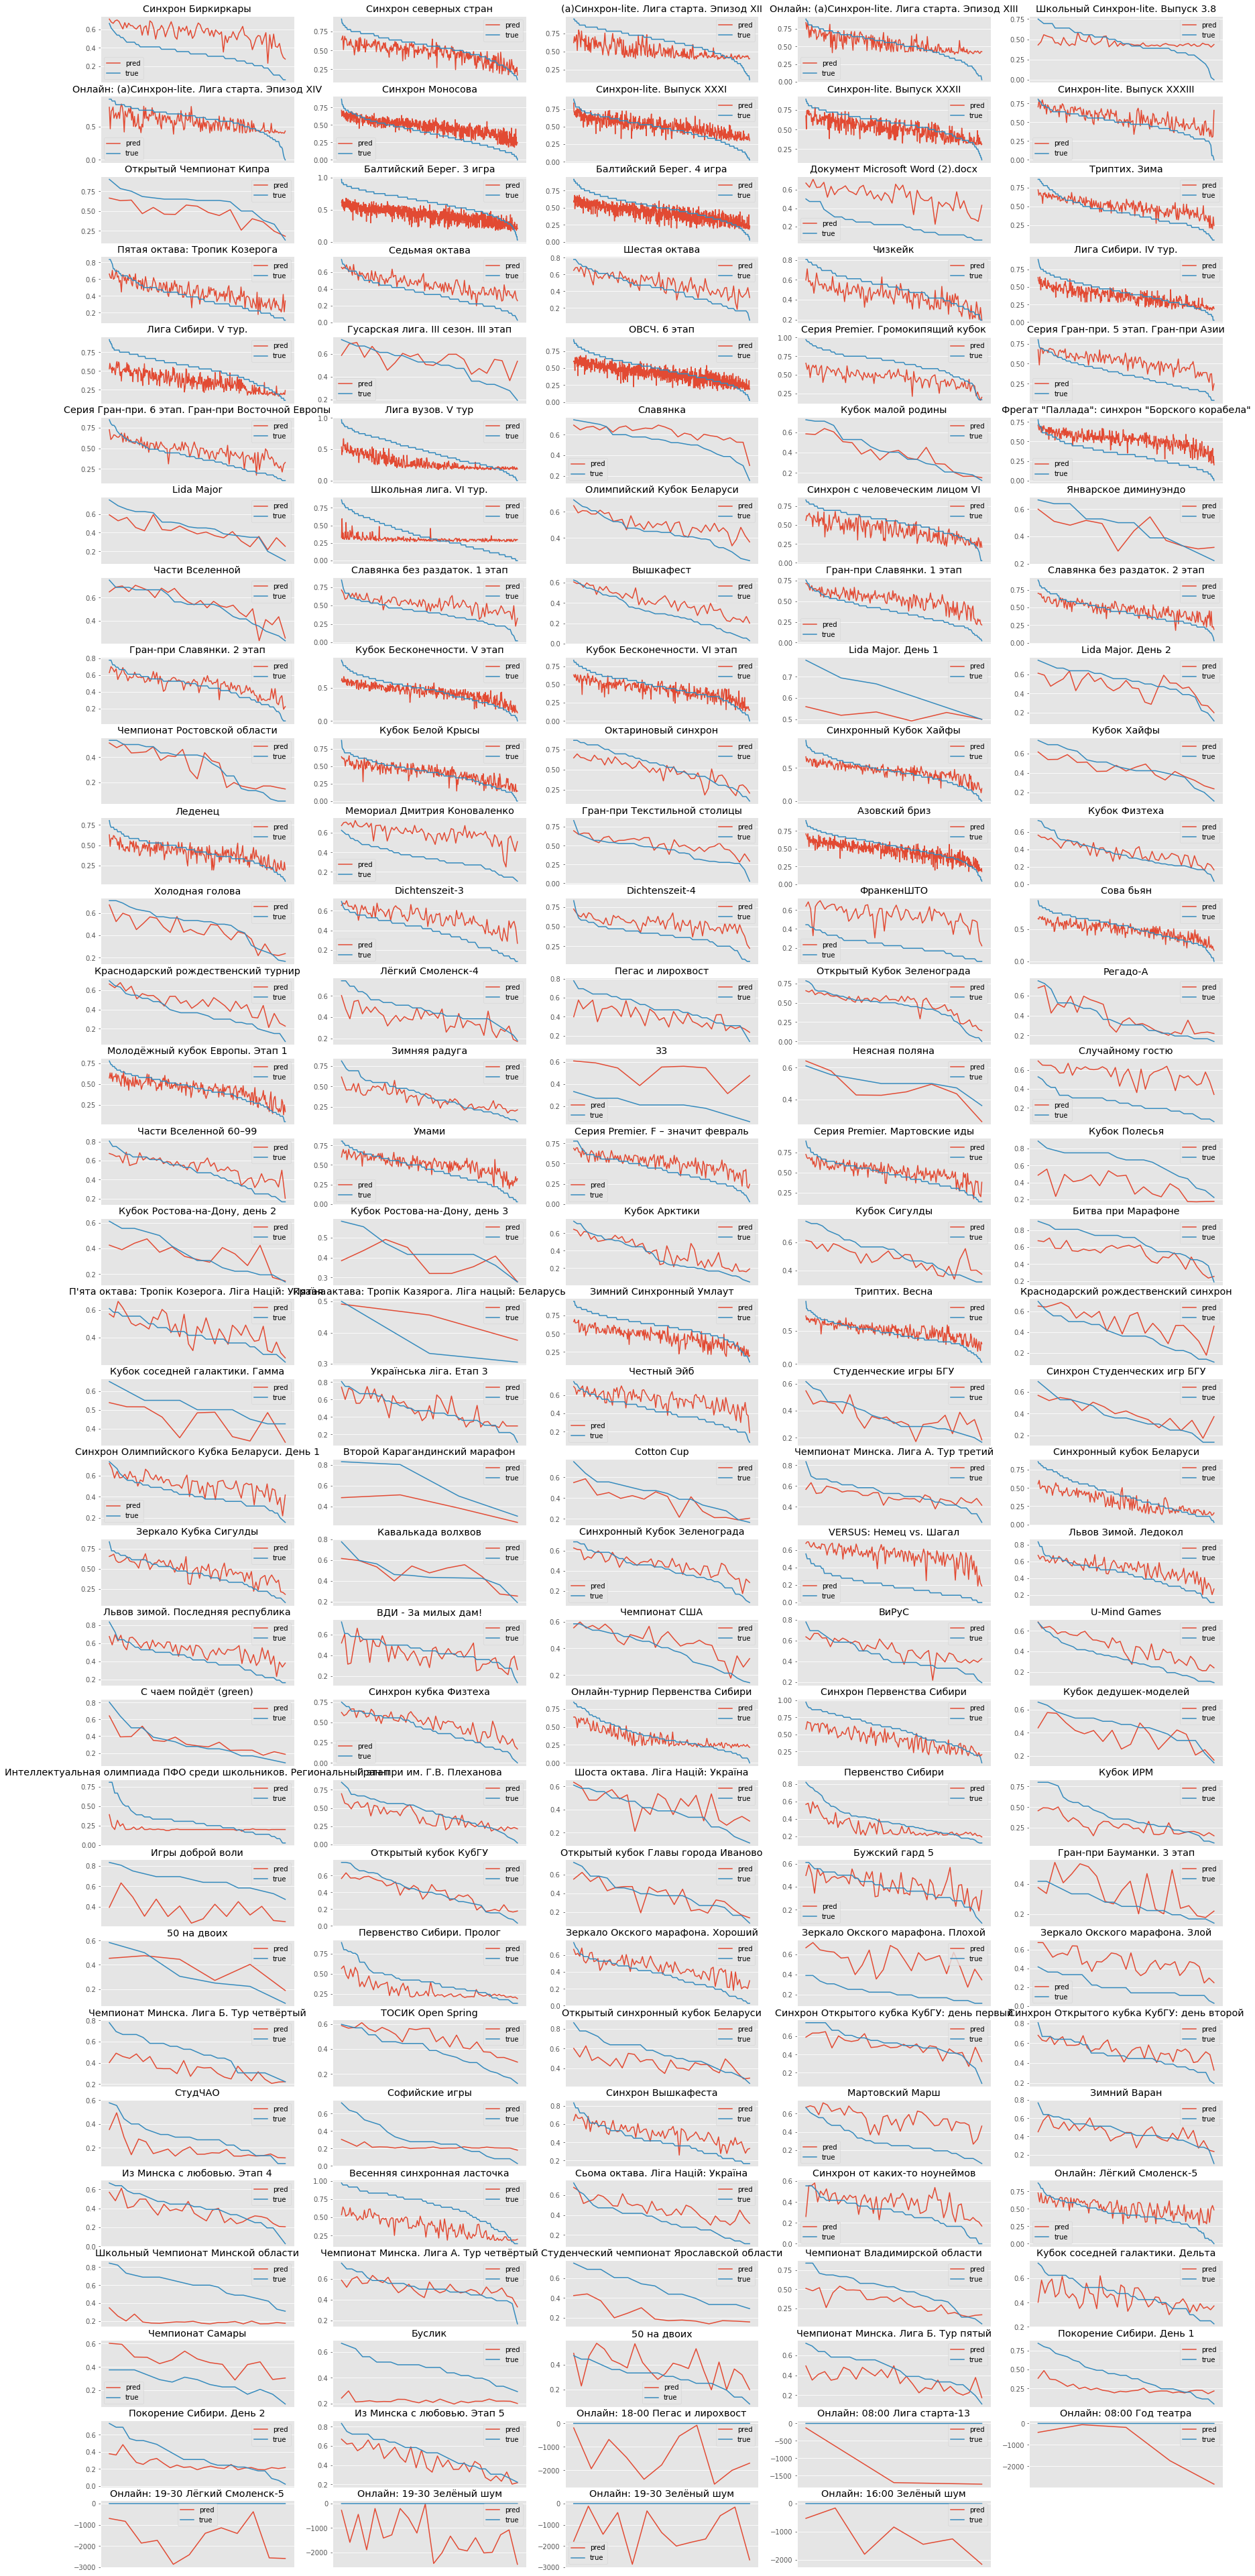

In [ ]:
res_tables = {}
fig = plt.figure(figsize=(30, 70))
for i, tour in enumerate(X_test_df):
  res_tables[tour] = pd.DataFrame(columns=['linreg_pred', 'true'], index=X_test_df[tour].index)
  res_tables[tour]['linreg_pred'] = preds[tour]
  res_tables[tour]['true'] = y_test_df[tour]
  ax = plt.subplot(32, 5,  i % len(X_test_df) + 1)
  ax.plot(res_tables[tour]['linreg_pred'], figure=fig, label='pred')
  ax.plot(res_tables[tour]['true'] , figure=fig, label='true')
  ax.set_title(tuple(tournaments[tournaments['id']==tour]['name'])[0])
  ax.set_xticks([])
  ax.legend()
plt.show()

In [ ]:
X_train.columns

Index(['player1_id', 'player2_id', 'player3_id', 'player4_id', 'player5_id',
       'player6_id', 'rating1', 'rating2', 'rating3', 'rating4', 'rating5',
       'rating6', 'teamSize', '2', '3', '6', '8', 'lite', 'other', 'кубок',
       'студ', 'чемп'],
      dtype='object')

In [ ]:
linreg.coef_

array([-1.30643430e-02, -1.18766534e-07, -1.04954062e-07,  1.09714926e-08,
        2.25692320e-08,  3.12188463e-08,  1.27048631e-05,  9.89991437e-06,
        1.47354855e-06,  4.15403084e-06,  2.19034795e-06,  5.38299652e-07,
        5.96989337e-03, -2.79975724e-02, -3.31540957e-02, -2.72042929e-03,
        6.38720974e-02,  1.32449331e-01,  7.31680815e-03, -4.48769686e-02,
       -6.79240068e-02, -2.69651636e-02])

In [ ]:
from scipy.stats import rankdata, spearmanr, kendalltau

In [ ]:
spearman_cors

In [ ]:
rankdata(preds[tour])

array([6., 7., 4., 2., 5., 3., 1.])

In [ ]:
y_test_rank_df = {}
preds_rank_df = {}
spearman_cors = np.zeros((len(X_test_df)))
kendall_cors = np.zeros((len(X_test_df)))
for i, tour in enumerate(X_test_df):
  y_test_rank_df[tour] = players_res_test[players_res_test['tour_id']==tour]['tour_position']
  preds_rank_df[tour] = rankdata(preds[tour])
  spearman_cors[i] = spearmanr(-1 * y_test_rank_df[tour], preds_rank_df[tour])[0]
  kendall_cors[i] = kendalltau(-1 * y_test_rank_df[tour], preds_rank_df[tour])[0]
  # print(mean(spearman_cors), mean(kendall_cors))

spearman_cors.mean(), kendall_cors.mean()

(0.779009291846302, 0.6230201967141189)

# Linreg2

In [ ]:
import pickle

In [ ]:
players_dict_masked = {id: pd.DataFrame(columns=['tour_pos', 'tour_result', 'tour_class', 'tour_type', 'mask']) for id in players['id']}

for i, idx in enumerate(results_train_df):
  print(i / len(results_train_df))
  tour = results_train_df[idx]
  for command in tour['team']:
    comm_res = int(tour[tour.team==command]['questionsTotal']) / len(tuple(tour.loc[tour.team==command]['mask'])[0])
    players_com =  tuple(tour[tour.team==command]['teamMembers'])[0]
    mask = tuple(tour.loc[tour.team==command]['mask'])[0]
    cmd = { 'tour_type':int(tour[tour.team==command]['type']), 'tour_class': tuple(tour[tour.team==command]['class'])[0],
            'tour_pos': tuple(tour[tour.team==command]['position'])[0],
           'tour_result': comm_res, 'mask': mask}
    for player in players_com:
      players_dict_masked[player] = players_dict_masked[player].append(cmd, ignore_index=True)
      
with open('/content/drive/MyDrive/made_ml/players_dict_masked.pickle', 'wb') as handle:
    pickle.dump(players_dict_masked, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/made_ml/players_dict_masked.pickle', 'rb') as handle:
    players_dict_masked = pickle.load(handle)

In [ ]:
lengths = np.zeros((len(players_dict_masked)))
for i, player in enumerate(players_dict_masked):
  lengths[i] = len(players_dict_masked[player])

lengths.mean(), lengths.var()

(1.8496787756722188, 60.120619105098655)

In [ ]:
lengths[:100]

array([ 0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0., 18.,  0.,  0., 19.,  0.,  0.,
        7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,  0.,  0.,  0.,
        0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., 21., 19.,  0., 31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  4.,  3.,  0.])

In [ ]:
unique, counts = np.unique(lengths, return_counts=True)
dict(zip(unique, counts)) # участников, сыгравших меньше 2 игр в 2019 удаляем, т.к. непонятно, как обучать их рейтинг

In [ ]:
len(players_dict_masked)

204063

In [ ]:
max(unique)

216.0

In [ ]:
zero_players = []
for i, player in enumerate(players_dict_masked):
  if len(players_dict_masked[player]) < 2:
    zero_players.append(player)

for player in zero_players:
  players_dict_masked.pop(player)



In [ ]:
len(players_dict_masked)

29804

In [ ]:
players_dict_masked.keys()

dict_keys([15, 16, 31, 35, 38, 47, 59, 65, 79, 80, 82, 98, 112, 113, 117, 119, 133, 136, 144, 150, 153, 176, 178, 182, 196, 223, 230, 232, 233, 261, 278, 315, 322, 323, 328, 330, 345, 354, 376, 379, 385, 397, 398, 409, 415, 419, 445, 447, 453, 457, 474, 475, 486, 487, 489, 490, 503, 505, 509, 531, 535, 537, 571, 576, 591, 599, 602, 619, 623, 631, 639, 641, 644, 656, 658, 660, 662, 668, 670, 680, 683, 691, 696, 699, 712, 716, 726, 731, 747, 757, 772, 777, 781, 789, 798, 803, 808, 811, 822, 824, 837, 840, 849, 851, 853, 856, 860, 868, 881, 885, 887, 902, 904, 929, 932, 950, 958, 1000, 1001, 1007, 1019, 1022, 1033, 1042, 1043, 1049, 1050, 1055, 1062, 1068, 1073, 1076, 1123, 1136, 1137, 1140, 1145, 1157, 1174, 1197, 1215, 1218, 1239, 1243, 1246, 1257, 1261, 1265, 1266, 1284, 1305, 1313, 1325, 1339, 1340, 1344, 1345, 1348, 1349, 1350, 1351, 1352, 1354, 1364, 1369, 1370, 1372, 1375, 1387, 1391, 1412, 1424, 1425, 1432, 1433, 1444, 1454, 1468, 1471, 1472, 1477, 1487, 1488, 1498, 1511, 1513, 15

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
players_res_train['tour_type'].unique()

array([3, 8, 2, 6])

In [ ]:
type_enc = OneHotEncoder()
type_enc.fit(players_res_train['tour_type'].to_numpy().reshape(-1, 1))

class_enc = OneHotEncoder()
class_enc.fit(players_res_train['tour_class'].to_numpy().reshape(-1, 1))
# type_enc.transform(players_dict_masked[15]['tour_type'].to_numpy().reshape(-1, 1)).toarray()

OneHotEncoder()

In [ ]:
for player in players_dict_masked:
# player=15
  type_dummies = pd.DataFrame(type_enc.transform(players_dict_masked[player]['tour_type'].to_numpy().reshape(-1, 1)).toarray(), columns=['type_1', 'type_2', 'type_3', 'type_4'])
  class_dummies = pd.DataFrame(class_enc.transform(players_dict_masked[player]['tour_class'].to_numpy().reshape(-1, 1)).toarray(), columns=['class_1', 'class_2', 'class_3', 'class_4', 'class_5'])
  players_dict_masked[player] = pd.concat([players_dict_masked[player], type_dummies], axis=1)
  players_dict_masked[player] = pd.concat([players_dict_masked[player], class_dummies], axis=1)
# players_dict_masked[player].drop(columns=['tour_type', 'tour_class'], inplace=True)


In [ ]:
players_dict_masked[16]

tour_pos  tour_result tour_class tour_type  \
0       7.0     0.500000       чемп         2   
1      17.0     0.477778      other         2   
2      32.0     0.694444      other         3   

                                                mask  type_1  type_2  type_3  \
0  1011010100010101100010100010110011101111010011...     1.0     0.0     0.0   
1  1000100010100001101001010000011001110011111111...     1.0     0.0     0.0   
2               101110001111111011101100111111011010     0.0     1.0     0.0   

   type_4  class_1  class_2  class_3  class_4  class_5  
0     0.0      0.0      0.0      0.0      0.0      1.0  
1     0.0      0.0      1.0      0.0      0.0      0.0  
2     0.0      0.0      1.0      0.0      0.0      0.0

In [ ]:
with open('/content/drive/MyDrive/made_ml/players_dict_masked.pickle', 'wb') as handle:
    pickle.dump(players_dict_masked, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/made_ml/players_dict_masked.pickle', 'rb') as handle:
    players_dict_masked = pickle.load(handle)

In [ ]:
cols_order = [ 'type_1', 'type_2', 'type_3', 'type_4', 'class_1',
       'class_2', 'class_3', 'class_4', 'class_5', 'tour_result']
for player in players_dict_masked:
  players_dict_masked[player].drop(columns=['tour_type', 'tour_class', 'mask', 'tour_pos'], inplace=True)
  players_dict_masked[player] = players_dict_masked[player][cols_order]

In [ ]:
players_dict_masked[15]

type_1  type_2  type_3  type_4  class_1  class_2  class_3  class_4  \
0      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
1      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
2      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
3      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
4      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
5      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
6      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
7      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
8      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
9      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
10     0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
11     0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
12     0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   

    class_5  tour_result  
0       0.0     0.472222  
1       0.0     0.611111  
2       0.0     0.527778  
3       0.0     0.400000  
4       0.0     0.361111  
5       0.0     0.305556  
6       0.0     0.222222  
7       0.0     0.305556  
8       0.0     0.333333  
9       0.0     0.222222  
10      0.0     0.472222  
11      0.0     0.166667  
12      0.0     0.155556

In [ ]:
players_dict_masked[player].tail(1)

type_1  type_2  type_3  type_4  class_1  class_2  class_3  class_4  \
1     0.0     1.0     0.0     0.0      0.0      0.0      1.0      0.0   

   class_5  tour_result  
1      0.0     0.111111

In [ ]:
last_tours = pd.DataFrame(columns=cols_order)
for player in players_dict_masked:
  last_tours = last_tours.append(players_dict_masked[player].tail(1))
  players_dict_masked[player].drop(players_dict_masked[player].tail(1).index, inplace=True)

In [ ]:
last_tours.reset_index(drop=True, inplace=True)

In [ ]:
last_tours.head()

type_1  type_2  type_3  type_4  class_1  class_2  class_3  class_4  \
0     0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
1     0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
2     1.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   
3     1.0     0.0     0.0     0.0      0.0      1.0      0.0      0.0   
4     0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   

   class_5  tour_result  
0      0.0     0.155556  
1      0.0     0.694444  
2      1.0     0.266667  
3      0.0     0.472222  
4      0.0     0.083333

In [ ]:
players_dict_masked[15]

type_1  type_2  type_3  type_4  class_1  class_2  class_3  class_4  \
0      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
1      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
2      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
3      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
4      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
5      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
6      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
7      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
8      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
9      0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
10     0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   
11     0.0     1.0     0.0     0.0      0.0      1.0      0.0      0.0   

    class_5  tour_result  
0       0.0     0.472222  
1       0.0     0.611111  
2       0.0     0.527778  
3       0.0     0.400000  
4       0.0     0.361111  
5       0.0     0.305556  
6       0.0     0.222222  
7       0.0     0.305556  
8       0.0     0.333333  
9       0.0     0.222222  
10      0.0     0.472222  
11      0.0     0.166667

In [ ]:
m_len = int(max(lengths) * len(players_dict_masked[15].columns))
n_len = len(players_dict_masked)
n_len, m_len # верю в силу склерна

(29804, 2160)

In [ ]:
players_dict_masked[15]['tour_result'].mean()

0.3666666666666667

In [ ]:
PLAYERS_DICT_CLEAN_PATH = '/content/drive/MyDrive/made_ml/players_dict_clean.pickle'

In [ ]:
with open(PLAYERS_DICT_CLEAN_PATH, 'wb') as handle:
  pickle.dump(players_dict_masked, handle)

In [ ]:
X_train = np.zeros((n_len, m_len)) # последняя колонка целевая
tour_len = len(players_dict_masked[15].columns)

for i, player in enumerate(players_dict_masked):
  num_games = len(players_dict_masked[player])
  X_train[i, :tour_len * num_games] = players_dict_masked[player].to_numpy().flatten()
  tail = players_dict_masked[player].mode(axis=0).iloc[0]
  tail['tour_result'] = players_dict_masked[player]['tour_result'].mean()
  tail = tail.to_numpy()
  tail = np.tile(tail, (m_len - tour_len * num_games) // tour_len)
  X_train[i, tour_len * num_games:] = tail
  X_train[i, m_len - tour_len:] = last_tours.iloc[i].to_numpy()


In [ ]:
X_train[0, :30]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.47222222,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.61111111,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.52777778])

In [ ]:
X_train[0, 20:]

array([0.        , 1.        , 0.        , ..., 0.        , 0.        ,
       0.15555556])

In [ ]:
X_train_df = pd.DataFrame(X_train, index=players_dict_masked.keys())
X_train_df.head()

0     1     2     3     4     5     6     7     8         9     ...  2150  \
15   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.472222  ...   0.0   
16   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  0.500000  ...   0.0   
31   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0  0.833333  ...   1.0   
35   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.500000  ...   1.0   
38   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.166667  ...   0.0   

    2151  2152  2153  2154  2155  2156  2157  2158      2159  
15   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.155556  
16   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.694444  
31   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  0.266667  
35   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.472222  
38   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.083333  

[5 rows x 2160 columns]

In [ ]:
y_train = X_train_df[X_train_df.columns[-1]]
X_train_df.drop(columns=[X_train_df.columns[-1]], inplace=True)
y_train.head()

15    0.155556
16    0.694444
31    0.266667
35    0.472222
38    0.083333
Name: 2159, dtype: float64

In [ ]:
X_train_df.head()

0     1     2     3     4     5     6     7     8         9     ...  \
15   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.472222  ...   
16   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  0.500000  ...   
31   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0  0.833333  ...   
35   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.500000  ...   
38   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  0.166667  ...   

        2149  2150  2151  2152  2153  2154  2155  2156  2157  2158  
15  0.366667   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
16  0.488889   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
31  0.452369   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  
35  0.531458   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
38  0.190741   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  

[5 rows x 2159 columns]

In [ ]:
linreg = LinearRegression().fit(X_train_df, y_train)

In [ ]:
train_preds = linreg.predict(X_train_df)

In [ ]:
train_preds

array([0.36825562, 0.44624329, 0.33824921, ..., 0.34381104, 0.40005493,
       0.41947937])

In [ ]:
res_table_train = pd.DataFrame(index=X_train_df.index, columns=['true', 'pred'])
res_table_train['pred'] = train_preds
res_table_train['true'] = y_train
res_table_train.sort_values(by='true', ignore_index=True, inplace=True, ascending=False)

In [ ]:
res_table_train.head()

true      pred
15  0.155556  0.368256
16  0.694444  0.446243
31  0.266667  0.338249
35  0.472222  0.448151
38  0.083333  0.289124

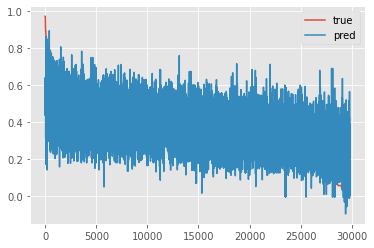

In [ ]:
plt.plot(res_table_train['true'], label='true')
plt.plot(res_table_train['pred'], label='pred')
plt.legend()
plt.show()

In [ ]:
# возвращаем индекс
res_table_train = pd.DataFrame(index=X_train_df.index, columns=['true', 'pred'])
res_table_train['pred'] = train_preds
res_table_train['true'] = y_train

In [ ]:
players_res_train.head()

player1_id  player2_id  player3_id  player4_id  player5_id  player6_id  \
0        6212       18332       18036       22799       15456       26089   
1        1585       40840        1584       10998       16206           0   
2       23513       18168       21060       35850       31332       10187   
3       36742       28939       54289       15381       27375           0   
4       28689       17720       30597       12400       26988       69476   

   rating1  rating2  rating3  rating4  ...  command  2  3  6  8  lite  other  \
0    13507    13185    12801    12801  ...    45556  0  1  0  0     0      1   
1    13058     9138     9030     8863  ...     1030  0  1  0  0     0      1   
2     9584     9437     9358     9306  ...     4252  0  1  0  0     0      1   
3     8592     8258     7995     7455  ...     5444  0  1  0  0     0      1   
4    12069     9712     8717     8678  ...    40931  0  1  0  0     0      1   

  кубок  студ  чемп  
0     0     0     0  
1     0     0     0  
2     0     0     0  
3     0     0     0  
4     0     0     0  

[5 rows x 28 columns]

In [ ]:
new_players_res_train = pd.DataFrame(columns=[
                                          'rating1_pred','rating2_pred', 'rating3_pred', 'rating4_pred','rating5_pred', 'rating6_pred',
                                          'tour_result', 'teamSize', 'tour_type', 'tour_class'], 
                                     )

for i, idx in enumerate(results_train_df):
  print(i / len(results_train_df))
  tour = results_train_df[idx]
  for command in tour['team']:
    comm_res = int(tour[tour.team==command]['questionsTotal']) / len(tuple(tour.loc[tour.team==command]['mask'])[0])
    players =  tuple(tour[tour.team==command]['teamMembers'])[0]
    cmd = { 'tour_id': idx,  'tour_result': comm_res, 
                      'teamSize':int(tour[tour.team==command]['teamSize']),
                      'tour_type':int(tour[tour.team==command]['type']), 'tour_class': tuple(tour[tour.team==command]['class'])[0],
                      'rating1_pred' : None,'rating2_pred': None, 'rating3_pred': None, 'rating4_pred': None,'rating5_pred': None,
                       'rating6_pred': None
                       }
    i = 0
    for player in players:
      if i < 6 and player in res_table_train.index:
       cmd[f'rating{i + 1}_pred'] = res_table_train.loc[player]['pred']
       i += 1
    new_players_res_train = new_players_res_train.append(cmd, ignore_index=True) 


In [ ]:
new_players_res_train = new_players_res_train.apply(lambda row: row.fillna(row[[
                                                        'rating1_pred','rating2_pred', 'rating3_pred',
                                                        'rating4_pred','rating5_pred', 'rating6_pred']].mean()), axis=1)

In [ ]:
new_players_res_train.dropna(axis=0, how='any', inplace=True)

In [ ]:
new_players_res_train.tail()

rating1_pred  rating2_pred  rating3_pred  rating4_pred  rating5_pred  \
73022      0.425903      0.397430      0.444458      0.493439      0.403137   
73025      0.443111      0.443111      0.443111      0.443111      0.443111   
73027      0.297256      0.297256      0.297256      0.297256      0.297256   
73030      0.426605      0.372742      0.367462      0.372742      0.384888   
73031      0.349487      0.323730      0.254707      0.338043      0.320614   

       rating6_pred  tour_result  teamSize  tour_type tour_class  tour_id  
73022      0.432874     0.472222         6          2      other   6191.0  
73025      0.443111     0.333333         6          2      other   6191.0  
73027      0.297256     0.250000         6          2      other   6191.0  
73030      0.384888     0.222222         4          2      other   6191.0  
73031      0.350098     0.222222         6          2      other   6191.0

In [ ]:
type_dummies = pd.get_dummies(new_players_res_train.tour_type)
class_dummies = pd.get_dummies(new_players_res_train.tour_class)

new_players_res_train = pd.concat([new_players_res_train, type_dummies], axis=1)
new_players_res_train = pd.concat([new_players_res_train, class_dummies], axis=1)

new_players_res_train.head()

rating1_pred  rating2_pred  rating3_pred  rating4_pred  rating5_pred  \
0      0.374168      0.474480      0.627625      0.489159      0.519493   
1      0.638763      0.523651      0.508331      0.516541      0.494659   
2      0.435722      0.432396      0.441154      0.473808      0.492973   
3      0.423004      0.401367      0.430969      0.392548      0.450836   
4      0.435730      0.653839      0.610626      0.542542      0.546173   

   rating6_pred  tour_result  teamSize  tour_type tour_class  tour_id  2  3  \
0      0.553589     0.777778         6          3      other   4772.0  0  1   
1      0.536389     0.694444         5          3      other   4772.0  0  1   
2      0.435387     0.694444         6          3      other   4772.0  0  1   
3      0.419745     0.694444         5          3      other   4772.0  0  1   
4      0.557800     0.694444         6          3      other   4772.0  0  1   

   6  8  lite  other  кубок  студ  чемп  
0  0  0     0      1      0     0     0  
1  0  0     0      1      0     0     0  
2  0  0     0      1      0     0     0  
3  0  0     0      1      0     0     0  
4  0  0     0      1      0     0     0

In [ ]:
new_players_res_train.drop(columns=['tour_class', 'tour_type'], inplace=True)

In [ ]:
players_train_shuffled = shuffle(new_players_res_train)

In [ ]:
data_cols = [ 'rating1_pred','rating2_pred', 'rating3_pred',
              'rating4_pred','rating5_pred', 'rating6_pred',
              'teamSize',       2,              3,     6, 8, 'lite',
              'other',         'кубок',          'студ',          'чемп']

In [ ]:
X_train_tour = players_train_shuffled[data_cols]
y_train_tour = players_train_shuffled['tour_result']

In [ ]:
new_players_res_test = pd.DataFrame(columns=[
                                          'rating1_pred','rating2_pred', 'rating3_pred', 'rating4_pred','rating5_pred', 'rating6_pred',
                                          'tour_result', 'teamSize', 'tour_type', 'tour_class'], 
                                     )

for i, idx in enumerate(results_test_df):
  print(i / len(results_test_df))
  tour = results_test_df[idx]
  for command in tour['team']:
    comm_res = int(tour[tour.team==command]['questionsTotal']) / len(tuple(tour.loc[tour.team==command]['mask'])[0])
    players =  tuple(tour[tour.team==command]['teamMembers'])[0]
    cmd = { 'tour_id': idx,  'tour_result': comm_res, 
                      'teamSize':int(tour[tour.team==command]['teamSize']),
                      'tour_type':int(tour[tour.team==command]['type']), 'tour_class': tuple(tour[tour.team==command]['class'])[0],
                      'rating1_pred' : None,'rating2_pred': None, 'rating3_pred': None, 'rating4_pred': None,'rating5_pred': None,
                       'rating6_pred': None
                       }
    i = 0
    for player in players:
      if i < 6 and player in res_table_train.index:
       cmd[f'rating{i + 1}_pred'] = res_table_train.loc[player]['pred']
       i += 1
    new_players_res_test = new_players_res_test.append(cmd, ignore_index=True) 


In [ ]:
new_players_res_test = new_players_res_test.apply(lambda row: row.fillna(row[[
                                                        'rating1_pred','rating2_pred', 'rating3_pred',
                                                        'rating4_pred','rating5_pred', 'rating6_pred']].mean()), axis=1)

In [ ]:
new_players_res_test.dropna(axis=0, how='any', inplace=True)

In [ ]:
type_dummies = pd.get_dummies(new_players_res_test.tour_type)
class_dummies = pd.get_dummies(new_players_res_test.tour_class)

new_players_res_test = pd.concat([new_players_res_test, type_dummies], axis=1)
new_players_res_test = pd.concat([new_players_res_test, class_dummies], axis=1)

new_players_res_test.head()

rating1_pred  rating2_pred  rating3_pred  rating4_pred  rating5_pred  \
0      0.861877      0.743256      0.827759      0.856384      0.701813   
1      0.693878      0.383911      0.397736      0.390717      0.733398   
2      0.774750      0.472900      0.538086      0.497345      0.497894   
3      0.663177      0.435730      0.525208      0.556602      0.611542   
4      0.681427      0.594543      0.526947      0.415070      0.680481   

   rating6_pred  tour_result  teamSize  tour_type tour_class  tour_id  2  3  \
0      0.717743     0.666667         6          3      other   4957.0  0  1   
1      0.536560     0.615385         6          3      other   4957.0  0  1   
2      0.541992     0.589744         6          3      other   4957.0  0  1   
3      0.544792     0.564103         6          3      other   4957.0  0  1   
4      0.499657     0.538462         6          3      other   4957.0  0  1   

   6  8  lite  other  кубок  студ  чемп  
0  0  0     0      1      0     0     0  
1  0  0     0      1      0     0     0  
2  0  0     0      1      0     0     0  
3  0  0     0      1      0     0     0  
4  0  0     0      1      0     0     0

In [ ]:
new_players_res_test.drop(columns=['tour_class', 'tour_type'], inplace=True)

In [ ]:
X_test_df = {}
y_test_df = {}
for tour in new_players_res_test['tour_id'].unique():
  X_test_df[tour] =  new_players_res_test[new_players_res_test['tour_id']==tour][data_cols]
  y_test_df[tour] = new_players_res_test[new_players_res_test['tour_id']==tour]['tour_result']

In [ ]:
X_test_df[6362] # одна команда не интересно

rating1_pred  rating2_pred  rating3_pred  rating4_pred  rating5_pred  \
18053      0.509155       0.48172      0.605469      0.549683      0.444672   

       rating6_pred  teamSize  2  3  6  8  lite  other  кубок  студ  чемп  
18053      0.602081         7  0  0  0  1     0      1      0     0     0

In [ ]:
X_test_df.pop(6362)
y_test_df.pop(6362)

18053    0.583333
Name: tour_result, dtype: float64

In [ ]:
new_players_res_test.loc[new_players_res_test['tour_id']==6362].index

Int64Index([18053], dtype='int64')

In [ ]:
new_players_res_test.drop(index=new_players_res_test.loc[new_players_res_test['tour_id']==6362].index, inplace=True)

In [ ]:
norm_cols = ['rating1_pred','rating2_pred', 'rating3_pred', 'rating4_pred','rating5_pred', 'rating6_pred']

In [ ]:
for col in norm_cols:
  mean = X_train_tour[col].mean()
  std = X_train_tour[col].std()
  X_train_tour[col] = (X_train_tour[col] - mean) / std
  for tour in new_players_res_test['tour_id'].unique():
      X_test_df[tour][col] = (X_test_df[tour][col] - mean) / std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
linreg = LinearRegression().fit(X_train_tour, y_train_tour)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
preds = {}
for tour in X_test_df:
  preds[tour] = linreg.predict(X_test_df[tour])


In [ ]:
mse = {}
for tour in X_test_df:
  mse[tour] = ((preds[tour] - y_test_df[tour])**2).mean()

In [ ]:
mse

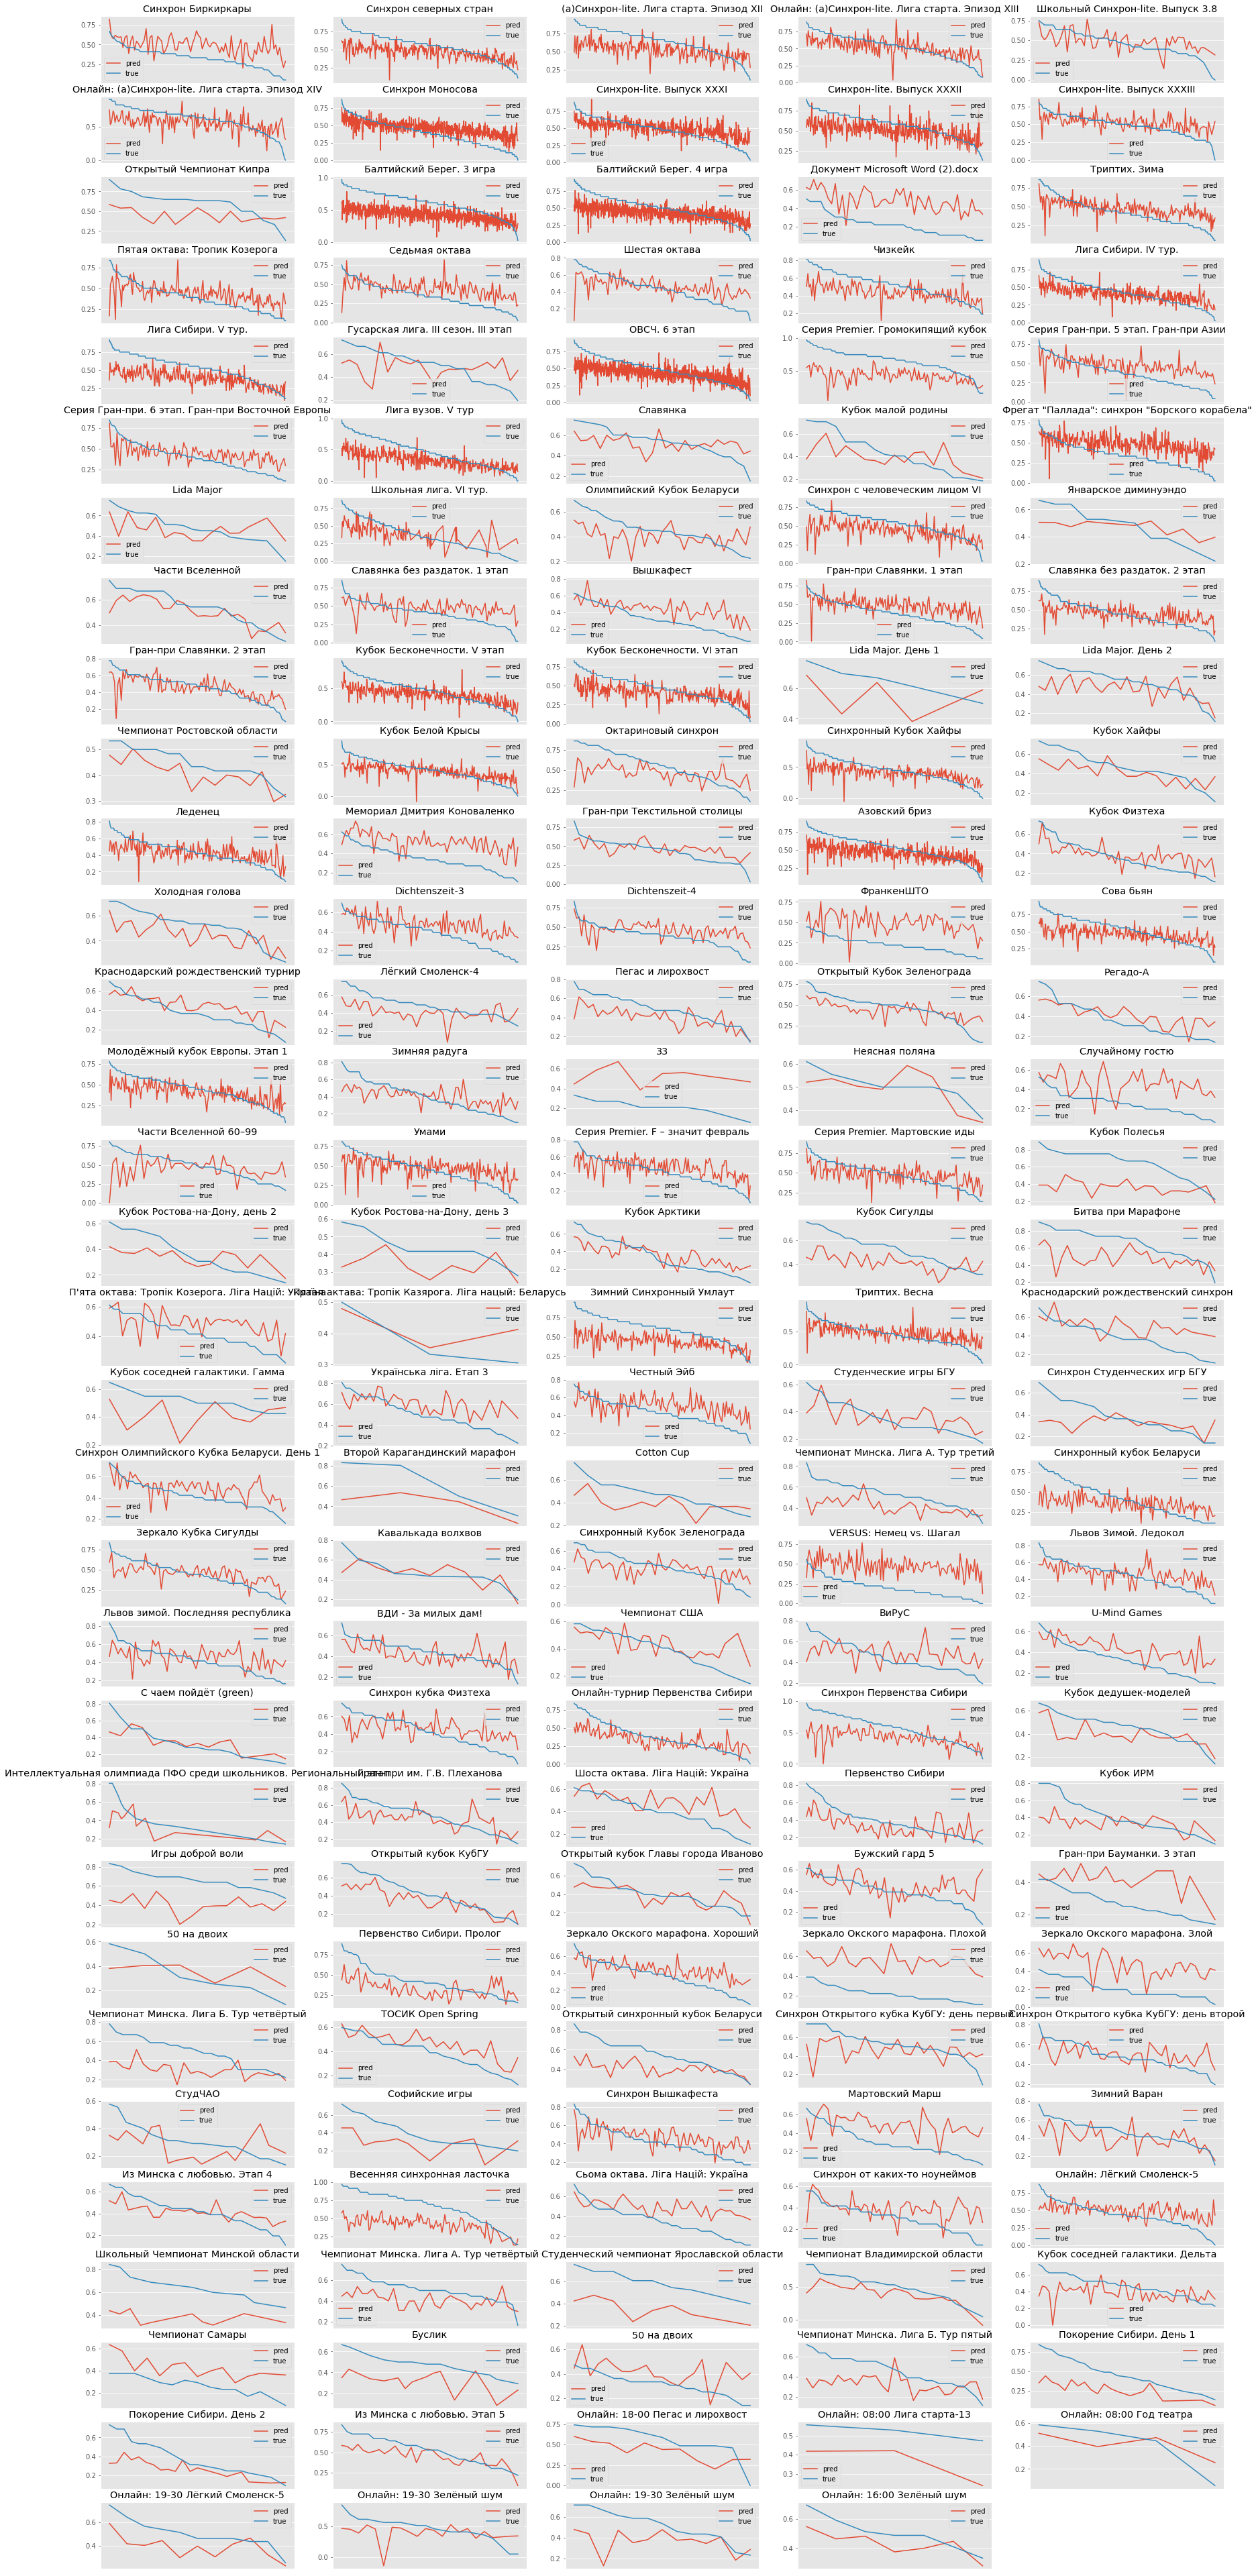

In [ ]:
res_tables = {}
fig = plt.figure(figsize=(30, 70))
for i, tour in enumerate(X_test_df):
  res_tables[tour] = pd.DataFrame(columns=['linreg_pred', 'true'], index=X_test_df[tour].index)
  res_tables[tour]['linreg_pred'] = preds[tour]
  res_tables[tour]['true'] = y_test_df[tour]
  ax = plt.subplot(32, 5,  i % len(X_test_df) + 1)
  ax.plot(res_tables[tour]['linreg_pred'], figure=fig, label='pred')
  ax.plot(res_tables[tour]['true'] , figure=fig, label='true')
  ax.set_title(tuple(tournaments[tournaments['id']==tour]['name'])[0])
  ax.set_xticks([])
  ax.legend()
plt.show()

In [ ]:
y_test_rank_df = {}
preds_rank_df = {}
spearman_cors = np.zeros((len(X_test_df)))
kendall_cors = np.zeros((len(X_test_df)))
for i, tour in enumerate(X_test_df):
  y_test_rank_df[tour] = rankdata(y_test_df[tour])
  preds_rank_df[tour] = rankdata(preds[tour])
  spearman_cors[i] = spearmanr(y_test_rank_df[tour], preds_rank_df[tour])[0]
  kendall_cors[i] = kendalltau(y_test_rank_df[tour], preds_rank_df[tour])[0]

spearman_cors.mean(), kendall_cors.mean()

(0.5668726799366787, 0.4265461924881615)

#DataPrepro2

In [1]:
PLAYERS_PATH = 'C:\\Users\\anke\\OneDrive\\Документы\\ML\\made nikolenko\\chgk\\players.pkl'
RESULTS_PATH = 'C:\\Users\\anke\\OneDrive\\Документы\\ML\\made nikolenko\\chgk\\results.pkl'
TOURNAMENTS_PATH = 'C:\\Users\\anke\\OneDrive\\Документы\\ML\\made nikolenko\\chgk\\tournaments.pkl'

In [8]:
import pandas as pd
import numpy as np
import pickle
from scipy.stats import rankdata, spearmanr, kendalltau
from matplotlib import pyplot as plt
import pickle
from datetime import datetime
from sklearn.linear_model import LogisticRegression, LinearRegression
plt.style.use('ggplot')

In [3]:
with open(PLAYERS_PATH, 'rb') as f:
  players = pickle.load(f)

players = pd.DataFrame(players).transpose()
players.head()


id     name  patronymic    surname
1    1  Алексей        None   Абабилов
10  10    Игорь                 Абалов
11  11  Наталья     Юрьевна  Абалымова
12  12    Артур  Евгеньевич    Абальян
13  13     Эрик  Евгеньевич    Абальян

In [ ]:
len(players)

204063

In [4]:
with open(RESULTS_PATH, 'rb') as f:
  results = pickle.load(f)


In [ ]:
results[1]

In [5]:
with open(TOURNAMENTS_PATH, 'rb') as f:
  tournaments = pickle.load(f)

tournaments = pd.DataFrame(tournaments).transpose()
tournaments.head()

id                                name                  dateStart  \
1  1            Чемпионат Южного Кавказа  2003-07-25T00:00:00+04:00   
2  2                         Летние зори  2003-08-09T00:00:00+04:00   
3  3                    Турнир в Ижевске  2003-11-22T00:00:00+03:00   
4  4  Чемпионат Украины. Переходной этап  2003-10-11T00:00:00+04:00   
5  5                 Бостонское чаепитие  2003-10-10T00:00:00+04:00   

                     dateEnd                          type      season  \
1  2003-07-27T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/1   
2  2003-08-09T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/1   
3  2003-11-24T00:00:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   
4  2003-10-12T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   
5  2003-10-13T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   

  orgcommittee synchData questionQty  
1           []      None        None  
2           []      None        None  
3           []      None        None  
4           []      None        None  
5           []      None        None

In [6]:
tournaments['start'] = pd.to_datetime(tournaments['dateStart'], utc=True).apply(lambda x: x.replace(tzinfo=None))
tournaments['end'] = pd.to_datetime(tournaments['dateEnd'], utc=True).apply(lambda x: x.replace(tzinfo=None))

tournaments.head()

id                                name                  dateStart  \
1  1            Чемпионат Южного Кавказа  2003-07-25T00:00:00+04:00   
2  2                         Летние зори  2003-08-09T00:00:00+04:00   
3  3                    Турнир в Ижевске  2003-11-22T00:00:00+03:00   
4  4  Чемпионат Украины. Переходной этап  2003-10-11T00:00:00+04:00   
5  5                 Бостонское чаепитие  2003-10-10T00:00:00+04:00   

                     dateEnd                          type      season  \
1  2003-07-27T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/1   
2  2003-08-09T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/1   
3  2003-11-24T00:00:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   
4  2003-10-12T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   
5  2003-10-13T00:00:00+04:00  {'id': 2, 'name': 'Обычный'}  /seasons/2   

  orgcommittee synchData questionQty               start                 end  
1           []      None        None 2003-07-24 20:00:00 2003-07-26 20:00:00  
2           []      None        None 2003-08-08 20:00:00 2003-08-08 20:00:00  
3           []      None        None 2003-11-21 21:00:00 2003-11-23 21:00:00  
4           []      None        None 2003-10-10 20:00:00 2003-10-11 20:00:00  
5           []      None        None 2003-10-09 20:00:00 2003-10-12 20:00:00

In [9]:
tournaments = tournaments[(datetime(2021, 1, 1, 0, 0, 0) > tournaments.start) &
                                (tournaments.start >= datetime(2019, 1, 1, 0, 0, 0))]

In [10]:
results = {id: results[id] for id in tournaments['id']}

In [11]:
id_to_del = set([])
for id in results:
  if len(results[id]) == 0:
    id_to_del.add(id)
    continue
  for command in results[id]:
    if (command.get('mask', -1) == -1) or (command['mask'] is None) or len(command['teamMembers']) == 0:
      id_to_del.add(id)
      continue

In [ ]:
len(id_to_del), len(results)

(291, 1105)

In [12]:
for id in id_to_del:
  results.pop(id)

tournaments.drop(index=id_to_del, inplace=True)

In [ ]:
len(results), len(tournaments)

(814, 814)

In [ ]:
results.keys()

dict_keys([4772, 4957, 4973, 4974, 4975, 5000, 5008, 5009, 5010, 5011, 5012, 5013, 5021, 5025, 5042, 5052, 5053, 5055, 5056, 5060, 5061, 5065, 5071, 5074, 5078, 5083, 5097, 5098, 5103, 5108, 5109, 5110, 5111, 5112, 5119, 5128, 5129, 5130, 5141, 5154, 5155, 5156, 5159, 5161, 5162, 5163, 5179, 5185, 5186, 5187, 5188, 5204, 5205, 5206, 5217, 5218, 5251, 5266, 5267, 5274, 5275, 5276, 5280, 5284, 5285, 5298, 5303, 5306, 5307, 5310, 5312, 5313, 5314, 5320, 5322, 5324, 5325, 5331, 5332, 5333, 5334, 5338, 5343, 5350, 5354, 5358, 5360, 5361, 5362, 5363, 5364, 5366, 5367, 5368, 5369, 5370, 5371, 5372, 5374, 5377, 5380, 5381, 5383, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5393, 5394, 5395, 5397, 5398, 5399, 5400, 5401, 5402, 5404, 5405, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450,

In [ ]:
results[4772]

In [13]:
results_df = {id: pd.DataFrame(results[id]) for id in results}

In [ ]:
results_df[4772].head()

In [14]:
def shorten_players_info(teamMembers):
  res = [member['player']['id'] for member in teamMembers]
  return res

In [15]:
cols_to_del = ['current', 'flags', 'controversials', 'synchRequest', 'questionsTotal', 'team']
for id in results_df:
  df = results_df[id]
  df.drop(columns=cols_to_del, inplace=True)
  df['teamMembers'] = df['teamMembers'].apply(shorten_players_info)

In [ ]:
results_df[4772]

In [16]:
types = {}
for tour in tournaments['type']:
  types[tour['id']] = tour['name']

In [ ]:
types

{2: 'Обычный',
 3: 'Синхрон',
 5: 'Общий зачёт',
 6: 'Строго синхронный',
 8: 'Асинхрон'}

In [ ]:
tournaments[tournaments['type'] == {'id': 2, 'name': 'Обычный'}].head()

id                                    name                  dateStart  \
5042  5042        Студенческий Кубок княгини Ольги  2019-03-30T12:00:00+03:00   
5111  5111                Открытый чемпионат Кипра  2019-03-08T19:00:00+03:00   
5112  5112                       Mediterranean Cup  2019-10-18T19:00:00+03:00   
5155  5155         Студенческий чемпионат Беларуси  2019-05-05T12:00:00+03:00   
5185  5185  Игра Первопрестольной. Четвёртый сезон  2019-06-01T12:30:00+03:00   

                        dateEnd                          type       season  \
5042  2019-03-31T16:00:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/52   
5111  2019-03-10T22:00:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/52   
5112  2019-10-20T13:00:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/53   
5155  2019-05-06T16:30:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/52   
5185  2019-06-02T16:30:00+03:00  {'id': 2, 'name': 'Обычный'}  /seasons/52   

                                           orgcommittee synchData  \
5042  [{'id': 40393, 'name': 'Юрий', 'patronymic': '...      None   
5111  [{'id': 55040, 'name': 'Владимир', 'patronymic...      None   
5112  [{'id': 55044, 'name': 'Светлана', 'patronymic...      None   
5155  [{'id': 53126, 'name': 'Василий', 'patronymic'...      None   
5185  [{'id': 46339, 'name': 'Антон', 'patronymic': ...      None   

                                            questionQty               start  \
5042  {'1': 12, '2': 12, '3': 12, '4': 12, '5': 12, ... 2019-03-30 09:00:00   
5111                        {'1': 15, '2': 15, '3': 15} 2019-03-08 16:00:00   
5112               {'1': 15, '2': 15, '3': 15, '4': 15} 2019-10-18 16:00:00   
5155      {'1': 15, '2': 15, '3': 15, '4': 15, '5': 15} 2019-05-05 09:00:00   
5185  {'1': 15, '2': 15, '3': 15, '4': 15, '5': 15, ... 2019-06-01 09:30:00   

                     end  
5042 2019-03-31 13:00:00  
5111 2019-03-10 19:00:00  
5112 2019-10-20 10:00:00  
5155 2019-05-06 13:30:00  
5185 2019-06-02 13:30:00

In [ ]:
results_df[5042]['mask'][0]

'111011011111100111111011111010111101111110101101100111110111111000000101'

In [ ]:
tournaments[tournaments['type'] == {'id': 5, 'name': 'Общий зачёт'}]

id                                name                  dateStart  \
6265  6265               Большой шлем Славянки  2020-01-25T13:00:00+03:00   
6307  6307  Славянка без раздаток. Общий зачёт  2020-02-01T12:00:00+03:00   
6308  6308      Гран-при Славянки. Общий зачёт  2020-02-15T12:00:00+03:00   

                        dateEnd                              type season  \
6265  2021-01-06T00:00:00+03:00  {'id': 5, 'name': 'Общий зачёт'}   None   
6307  2020-12-05T14:00:00+03:00  {'id': 5, 'name': 'Общий зачёт'}   None   
6308  2020-12-19T14:00:00+03:00  {'id': 5, 'name': 'Общий зачёт'}   None   

                                           orgcommittee synchData  \
6265  [{'id': 6528, 'name': 'Алексей', 'patronymic':...      None   
6307  [{'id': 37317, 'name': 'Элеонора', 'patronymic...      None   
6308  [{'id': 37317, 'name': 'Элеонора', 'patronymic...      None   

                               questionQty               start  \
6265  {'1': 45, '2': 45, '3': 36, '4': 36} 2020-01-25 10:00:00   
6307                    {'1': 45, '2': 36} 2020-02-01 09:00:00   
6308                    {'1': 45, '2': 36} 2020-02-15 09:00:00   

                     end  
6265 2021-01-05 21:00:00  
6307 2020-12-05 11:00:00  
6308 2020-12-19 11:00:00

In [ ]:
results_df[6265]['mask'][0] # так только в общем зачете

'111110010010011101110100011000111110100111010000100001011111111111010111010111001101011000111110110011111011111011101110101111111011110110111101010010011011111011'

In [17]:
id_to_del = tournaments[tournaments['type'] == {'id': 5, 'name': 'Общий зачёт'}]['id']
id_to_del

6265    6265
6307    6307
6308    6308
Name: id, dtype: object

In [18]:
for id in id_to_del:
  results_df.pop(id)

tournaments.drop(index=id_to_del, inplace=True)

In [19]:
tournaments_train = tournaments[(datetime(2020, 1, 1, 0, 0, 0) > tournaments.start) &
                                (tournaments.start >= datetime(2019, 1, 1, 0, 0, 0))]
tournaments_test = tournaments[(datetime(2021, 1, 1, 0, 0, 0) > tournaments.start) & 
                               (tournaments.start >= datetime(2020, 1, 1, 0, 0, 0))]

In [ ]:
assert len(np.intersect1d(tournaments_train['id'], tournaments_test['id'])) == 0

In [ ]:
tournaments_train['id'][:10]

4772    4772
4973    4973
4974    4974
4975    4975
5000    5000
5008    5008
5009    5009
5010    5010
5011    5011
5012    5012
Name: id, dtype: object

In [20]:
results_train = {id: results_df[id] for id in tournaments_train['id']}
results_test = {id: results_df[id] for id in tournaments_test['id']}

In [21]:
results_train_df = {id: pd.DataFrame(results_train[id]) for id in results_train}
results_test_df = {id: pd.DataFrame(results_test[id]) for id in results_test}

In [ ]:
results_train_df[4772]

In [22]:
train_players = set([])
questions_total = 0
for idx in results_train_df:
  tour = results_train_df[idx]
  questions_total += len(tour['mask'][0])
  for team in tour.index:
    for player in tour['teamMembers'].iloc[team]:
      train_players.add(player)

#Logit

достанем рейтинг игрока i из коеффициентов логистической регрессии:


$p(x_{iq}|rating_i, TourComplexity) = \sigma(rating_i + TourComplexity)$


где $p(x_{iq})$ - вероятность того что игрок i ответил на вопрос q.

Нам понадобится огромная таблица с one-hot векторами игроков для каждого вопроса. Чтобы не расширять ее еще сильнее, будем кроме рейтинга оценивать не сложность каждого вопроса, а всего турнира.

In [ ]:
results_train_df[4772].head()

mask  position  \
0  111111111011111110111111111100010010       1.0   
1  111111111011110100101111011001011010       5.5   
2  111111111011110101101111001011110000       5.5   
3  101111101111111110001101011001111010       5.5   
4  111111101011111101000111001001111110       5.5   

                                  teamMembers  
0   [6212, 18332, 18036, 22799, 15456, 26089]  
1           [1585, 40840, 1584, 10998, 16206]  
2  [23513, 18168, 21060, 35850, 31332, 10187]  
3         [36742, 28939, 54289, 15381, 27375]  
4  [28689, 17720, 30597, 12400, 26988, 69476]

In [ ]:
# оценим не сложность каждого вопроса, а сложность турнира, для этого нам понадбится только tour_id
for idx in results_train_df:
  results_train_df[idx].drop(columns=['position'], inplace=True)
  results_train_df[idx]['tour_id'] = np.ones((len(results_train_df[idx])), dtype=int) * idx


In [ ]:
results_train_df[4772].head()

mask  \
0  111111111011111110111111111100010010   
1  111111111011110100101111011001011010   
2  111111111011110101101111001011110000   
3  101111101111111110001101011001111010   
4  111111101011111101000111001001111110   

                                  teamMembers  tour_id  
0   [6212, 18332, 18036, 22799, 15456, 26089]     4772  
1           [1585, 40840, 1584, 10998, 16206]     4772  
2  [23513, 18168, 21060, 35850, 31332, 10187]     4772  
3         [36742, 28939, 54289, 15381, 27375]     4772  
4  [28689, 17720, 30597, 12400, 26988, 69476]     4772

In [ ]:
results_train_df[4973].head()

mask  \
0  111111111111111011110101110111111111   
1  111111111101111110111111111101110111   
2  111111111111111010111111111110100111   
3  111111111111110011111101110110111111   
4  111111111111111111100111101101100111   

                                 teamMembers  tour_id  
0   [6212, 18332, 18036, 22799, 7008, 26089]     4973  
1  [27822, 28751, 20691, 33620, 2421, 34909]     4973  
2  [8532, 21952, 19992, 58842, 11179, 44650]     4973  
3         [31184, 23537, 27879, 1907, 21889]     4973  
4        [28763, 32489, 32490, 23338, 30207]     4973

In [ ]:
for idx in results_test_df:
  results_test_df[idx].drop(columns=['position'], inplace=True)

In [ ]:
results_train_df[4772].explode('teamMembers', ignore_index=True)

mask teamMembers  tour_id
0     111111111011111110111111111100010010        6212     4772
1     111111111011111110111111111100010010       18332     4772
2     111111111011111110111111111100010010       18036     4772
3     111111111011111110111111111100010010       22799     4772
4     111111111011111110111111111100010010       15456     4772
...                                    ...         ...      ...
1202  100000000000100100001000000001100000      188829     4772
1203  100000100000100000001000000000000000      106582     4772
1204  100000100000100000001000000000000000      174472     4772
1205  100000100000100000001000000000000000      185941     4772
1206  100000100000100000001000000000000000      188948     4772

[1207 rows x 3 columns]

In [50]:
exploded = results_train_df[4772].explode('teamMembers', ignore_index=True)

In [ ]:
exploded.head()

mask teamMembers  tour_id
0  111111111011111110111111111100010010        6212     4772
1  111111111011111110111111111100010010       18332     4772
2  111111111011111110111111111100010010       18036     4772
3  111111111011111110111111111100010010       22799     4772
4  111111111011111110111111111100010010       15456     4772

In [45]:
# все игроки, которые были на турнирах в 2019
train_players = set([])
for idx in results_train_df:
  tour = results_train_df[idx]
  for team in tour.index:
    for player in tour['teamMembers'].iloc[team]:
      train_players.add(player)

train_players = list(train_players)
len(train_players)

53972

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
enc_players = OneHotEncoder()
enc_players.fit(pd.Series(train_players).to_numpy().reshape(-1, 1))

enc_tours = OneHotEncoder()
enc_tours.fit(np.array(list(results_train_df.keys())).reshape(-1, 1)) # все туры

OneHotEncoder()

In [51]:
exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mask         1207 non-null   object
 1   teamMembers  1207 non-null   object
 2   team_id      1207 non-null   int64 
 3   tour_id      1207 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 33.1+ KB


In [52]:
# таблица для одного турнира выглядит так
dummies_players = pd.DataFrame(enc_players.transform(exploded['teamMembers'].to_numpy().reshape(-1, 1)).toarray() ,
                               columns=enc_players.categories_[0], index=exploded.index)

tour_dummies_cols = [f'q_{i}' for i in enc_tours.categories_[0]]
dummies_tours = pd.DataFrame(enc_tours.transform(exploded['tour_id'].to_numpy().reshape(-1, 1)).toarray() , 
                             columns=tour_dummies_cols, index=exploded.index)

exploded = pd.concat([exploded, dummies_players], axis=1)
exploded = pd.concat([exploded, dummies_tours], axis=1)
exploded.head()


mask teamMembers  team_id  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...        6212        0   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...       18332        0   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...       18036        0   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...       22799        0   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...       15456        0   

   tour_id   15   16   23   31   35   38  ...  q_6146  q_6147  q_6149  q_6150  \
0     4772  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0     0.0     0.0   
1     4772  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0     0.0     0.0   
2     4772  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0     0.0     0.0   
3     4772  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0     0.0     0.0   
4     4772  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0     0.0     0.0   

   q_6151  q_6159  q_6161  q_6170  q_6173  q_6191  
0     0.0     0.0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 54625 columns]

In [ ]:
exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Columns: 54640 entries, mask to q_6191
dtypes: float64(54637), int32(1), object(2)
memory usage: 503.2+ MB


In [ ]:
exploded.iloc[0][6212], exploded.iloc[0]['q_4772']

(1.0, 1.0)

In [ ]:
exploded.drop(columns=['teamMembers', 'tour_id'], inplace=True)

In [ ]:
exploded.columns

Index([  'mask',       15,       16,       23,       31,       35,       38,
             47,       59,       65,
       ...
       'q_6146', 'q_6147', 'q_6149', 'q_6150', 'q_6151', 'q_6159', 'q_6161',
       'q_6170', 'q_6173', 'q_6191'],
      dtype='object', length=54638)

In [ ]:
# начинаем строить повопросную таблицу для всех турниров, ohe-hot достроим отдельно для батчей
almost_train_df = pd.DataFrame(columns=results_train_df[4772].columns)
for i, idx in enumerate(results_train_df):
  print(i / len(results_train_df))
  tour = results_train_df[idx]
  exploded = tour.explode('teamMembers', ignore_index=True)
  almost_train_df = pd.concat([almost_train_df, exploded], axis=0, ignore_index=True)

In [ ]:
almost_train_df.tail()

mask teamMembers tour_id
377446  110000001000000000000000000000000100      217855    6191
377447  110000001000000000000000000000000100      217856    6191
377448  110000001000000000000000000000000100      217857    6191
377449  110000001000000000000000000000000100      217858    6191
377450  110000001000000000000000000000000100      217859    6191

In [ ]:
almost_train_df['mask'] = almost_train_df['mask'].apply(lambda x: list(x))

In [ ]:
almost_train_df = almost_train_df.explode('mask', ignore_index=True)

In [ ]:
id_to_del_x = almost_train_df['mask'][almost_train_df['mask']=='X'].index
almost_train_df.drop(index=id_to_del_x, inplace=True)

id_to_del_q = almost_train_df['mask'][almost_train_df['mask']=='?'].index
almost_train_df.drop(index=id_to_del_q, inplace=True)

In [71]:
import torch, torch.nn as nn
import torch.nn.functional as F
from random import sample

from IPython.display import clear_output

In [72]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=len(enc_players.categories_[0]) + len(tour_dummies_cols), out_features=1)
)

In [ ]:
crit = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-2)

In [75]:
from sklearn.utils import shuffle

In [ ]:
model.to(device)

Sequential(
  (0): Linear(in_features=54637, out_features=1, bias=True)
)

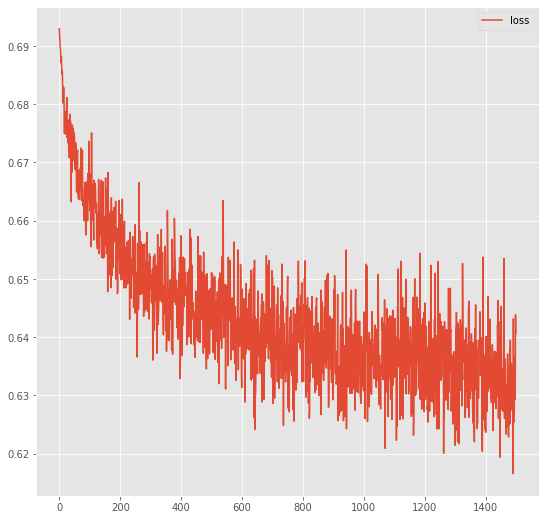

current loss: 0.6406783


In [ ]:
losses = []
batch_size = 2048
n_iter = 1500

model.train()

almost_train_shuffled = shuffle(almost_train_df)
X = almost_train_shuffled[['teamMembers', 'tour_id']]
y = almost_train_shuffled['mask']
ind = 0
for _ in range(n_iter):
  X_batch, y_batch = X.iloc[ind: ind + batch_size], y.iloc[ind: ind + batch_size].to_numpy().astype(np.float32)
  dummies_players = pd.DataFrame(enc_players.transform(X_batch['teamMembers'].to_numpy().reshape(-1, 1)).toarray() ,
                          columns=enc_players.categories_[0], index=X_batch.index)
  
  dummies_tours = pd.DataFrame(enc_tours.transform(X_batch['tour_id'].to_numpy().reshape(-1, 1)).toarray(),
                               columns=tour_dummies_cols, index=X_batch.index)

  X_batch = pd.concat([X_batch, dummies_players], axis=1)
  X_batch.drop(columns=['teamMembers'], inplace=True)
  X_batch = pd.concat([X_batch, dummies_tours], axis=1)
  X_batch.drop(columns=['tour_id'], inplace=True)
  
  
  X_batch = X_batch.to_numpy().astype(np.float32)
  X_batch_tensor, y_batch_tensor = torch.from_numpy(X_batch).to(device), torch.from_numpy(y_batch.reshape((-1, 1))).to(device)

  optim.zero_grad()

  logits = model(X_batch_tensor)
  loss = crit(logits, y_batch_tensor)
  losses.append(loss.data.cpu().detach().numpy())
  loss.backward()

  optim.step()

  ind += batch_size

  clear_output(True)
  plt.figure(figsize=(9, 9))
  plt.plot(losses, label='loss')
  plt.legend()
  plt.show()
  print('current loss:', losses[-1])




In [ ]:
weights = model[0].weight.data.cpu().detach().numpy()

In [ ]:
weights.shape

(1, 54637)

In [ ]:
len(enc_players.categories_[0])

53986

In [ ]:
#{id: вес игрока из регрессии}
players_scores = dict(zip(enc_players.categories_[0], weights.reshape((-1))))

In [ ]:
players_scores[4271]

0.2483638

#Logreg

Для оценки получившегося рейтинга предлагаю обучить линейную регрессию на долях правильных ответов команды в зависимости от рейтингов игроков и свойств турнира.

Для этого понадобится предположение, что в командах 6 игроков(рейтинг недостающих заменим средним, кто не помещается - увы), также учтем реальный размер команды в модели.

Сложность нового турнира нормально не предскажешь, поэтому предлагаю вытащить тип турнира(синхрон, обычный, асинхрон), а также класс турнира исходя из названия(чемпионат, студенческий, etc)

In [ ]:
results_train_df[4772].head()

mask  \
0  111111111011111110111111111100010010   
1  111111111011110100101111011001011010   
2  111111111011110101101111001011110000   
3  101111101111111110001101011001111010   
4  111111101011111101000111001001111110   

                                  teamMembers  tour_id  
0   [6212, 18332, 18036, 22799, 15456, 26089]     4772  
1           [1585, 40840, 1584, 10998, 16206]     4772  
2  [23513, 18168, 21060, 35850, 31332, 10187]     4772  
3         [36742, 28939, 54289, 15381, 27375]     4772  
4  [28689, 17720, 30597, 12400, 26988, 69476]     4772

In [ ]:
types = {}
for tour in tournaments_train['type']:
  types[tour['id']] = tour['name']


In [ ]:
for idx in results_train_df:
  results_train_df[idx]['type'] = tournaments_train.loc[idx]['type']['id']

results_train_df[4772].head()

mask  \
0  111111111011111110111111111100010010   
1  111111111011110100101111011001011010   
2  111111111011110101101111001011110000   
3  101111101111111110001101011001111010   
4  111111101011111101000111001001111110   

                                  teamMembers  tour_id  type  
0   [6212, 18332, 18036, 22799, 15456, 26089]     4772     3  
1           [1585, 40840, 1584, 10998, 16206]     4772     3  
2  [23513, 18168, 21060, 35850, 31332, 10187]     4772     3  
3         [36742, 28939, 54289, 15381, 27375]     4772     3  
4  [28689, 17720, 30597, 12400, 26988, 69476]     4772     3

In [ ]:
def make_types(name):
  res = ''
  if name.lower().find('чемпионат') != -1:
    res = 'чемп'
  elif name.lower().find('студ') != -1:
    res = 'студ'
  elif name.lower().find('кубок') != -1:
    res = 'кубок'
  elif name.lower().find('lite') != -1:
    res = 'lite'
  else:
    res = 'other'
  return res 

In [ ]:
tournaments_train['class'] = tournaments_train['name'].apply(make_types)
tournaments_test['class'] = tournaments_test['name'].apply(make_types)
tournaments_train.head(20)

In [ ]:
for idx in results_train_df:
  results_train_df[idx]['class'] = tournaments_train.loc[idx]['class']

results_train_df[4772].head()

mask  \
0  111111111011111110111111111100010010   
1  111111111011110100101111011001011010   
2  111111111011110101101111001011110000   
3  101111101111111110001101011001111010   
4  111111101011111101000111001001111110   

                                  teamMembers  tour_id  type  class  
0   [6212, 18332, 18036, 22799, 15456, 26089]     4772     3  other  
1           [1585, 40840, 1584, 10998, 16206]     4772     3  other  
2  [23513, 18168, 21060, 35850, 31332, 10187]     4772     3  other  
3         [36742, 28939, 54289, 15381, 27375]     4772     3  other  
4  [28689, 17720, 30597, 12400, 26988, 69476]     4772     3  other

In [ ]:
new_players_res_train = pd.DataFrame(columns=[
                                          'rating1_pred','rating2_pred', 'rating3_pred', 'rating4_pred','rating5_pred', 'rating6_pred',
                                          'tour_result', 'teamSize', 'tour_type', 'tour_class'], 
                                     )

for i, idx in enumerate(results_train_df):
  print(i / len(results_train_df))
  tour = results_train_df[idx]
  for command in tour.index:
    team = tour.iloc[command]
    mask = [int(i)  for i in team['mask'] if i in ['0', '1']]
    q_total = sum(mask)
    comm_res = q_total / len(mask)
    players =  team['teamMembers']
    cmd = { 'tour_id': idx,  'tour_result': comm_res, 
                      'teamSize': len(team['teamMembers']),
                      'tour_type': int(team['type']), 'tour_class': team['class'],
                      'rating1_pred' : None,'rating2_pred': None, 'rating3_pred': None, 'rating4_pred': None,'rating5_pred': None,
                       'rating6_pred': None
                       }
    i = 0
    for player in players:
      if i < 6 and player in players_scores:
       cmd[f'rating{i + 1}_pred'] = players_scores[player]
       i += 1
    new_players_res_train = new_players_res_train.append(cmd, ignore_index=True) 


In [ ]:
new_players_res_train.head()

rating1_pred rating2_pred rating3_pred rating4_pred rating5_pred  \
0      1.397623      1.69339      1.67845      1.81402      1.34814   
1      1.459386     0.879334     0.434876     0.739584     0.772725   
2      0.749631     0.772358     0.905745     0.780882       1.0645   
3      0.589564     0.595762     0.530338     0.586216     0.450563   
4      1.613967     0.787569      1.16386      0.91165       1.2566   

  rating6_pred  tour_result teamSize tour_type tour_class  tour_id  
0      1.67275     0.777778        6         3      other   4772.0  
1         None     0.694444        5         3      other   4772.0  
2     0.132438     0.694444        6         3      other   4772.0  
3         None     0.694444        5         3      other   4772.0  
4      0.91143     0.694444        6         3      other   4772.0

In [ ]:
new_players_res_train = new_players_res_train.apply(lambda row: row.fillna(row[[
                                                        'rating1_pred','rating2_pred', 'rating3_pred',
                                                        'rating4_pred','rating5_pred', 'rating6_pred']].mean()), axis=1)

In [ ]:
new_players_res_train.dropna(axis=0, how='any', inplace=True)

In [ ]:
type_dummies = pd.get_dummies(new_players_res_train.tour_type)
class_dummies = pd.get_dummies(new_players_res_train.tour_class)

new_players_res_train = pd.concat([new_players_res_train, type_dummies], axis=1)
new_players_res_train = pd.concat([new_players_res_train, class_dummies], axis=1)

new_players_res_train.head()

rating1_pred  rating2_pred  rating3_pred  rating4_pred  rating5_pred  \
0      1.397623      1.693391      1.678451      1.814021      1.348140   
1      1.459386      0.879334      0.434876      0.739584      0.772725   
2      0.749631      0.772358      0.905745      0.780882      1.064495   
3      0.589564      0.595762      0.530338      0.586216      0.450563   
4      1.613967      0.787569      1.163860      0.911650      1.256600   

   rating6_pred  tour_result  teamSize  tour_type tour_class  tour_id  2  3  \
0      1.672747     0.777778         6          3      other   4772.0  0  1   
1      0.857181     0.694444         5          3      other   4772.0  0  1   
2      0.132438     0.694444         6          3      other   4772.0  0  1   
3      0.550489     0.694444         5          3      other   4772.0  0  1   
4      0.911430     0.694444         6          3      other   4772.0  0  1   

   6  8  lite  other  кубок  студ  чемп  
0  0  0     0      1      0     0     0  
1  0  0     0      1      0     0     0  
2  0  0     0      1      0     0     0  
3  0  0     0      1      0     0     0  
4  0  0     0      1      0     0     0

In [ ]:
new_players_res_train.drop(columns=['tour_class', 'tour_type'], inplace=True)

In [ ]:
players_train_shuffled = shuffle(new_players_res_train)

In [ ]:
data_cols = [ 'rating1_pred','rating2_pred', 'rating3_pred',
              'rating4_pred','rating5_pred', 'rating6_pred',
              'teamSize',       2,              3,     6, 8, 'lite',
              'other',         'кубок',          'студ',          'чемп']

In [ ]:
X_train_tour = players_train_shuffled[data_cols]
y_train_tour = players_train_shuffled['tour_result']

In [ ]:
results_test_df[4957].head()

mask  \
0  111111011111110110X11101111000101010001   
1  101111011111110100X00111111011100010100   
2  101110101011010000X11111111110100000111   
3  111101001110010110X11011111100000000111   
4  001110000011110111X01011111000100010111   

                                    teamMembers  
0     [30152, 30270, 27822, 28751, 27403, 4270]  
1  [34936, 40877, 25177, 113703, 33792, 107161]  
2    [33620, 21346, 13857, 46339, 37836, 19632]  
3     [32901, 28689, 19541, 13689, 9801, 18194]  
4     [6482, 34846, 36120, 32458, 25882, 30475]

In [ ]:
for idx in results_test_df:
  results_test_df[idx]['type'] = tournaments_test.loc[idx]['type']['id']

In [ ]:
for idx in results_test_df:
  results_test_df[idx]['class'] = tournaments_test.loc[idx]['class']

results_test_df[4957].head()

mask  \
0  111111011111110110X11101111000101010001   
1  101111011111110100X00111111011100010100   
2  101110101011010000X11111111110100000111   
3  111101001110010110X11011111100000000111   
4  001110000011110111X01011111000100010111   

                                    teamMembers  type  class  
0     [30152, 30270, 27822, 28751, 27403, 4270]     3  other  
1  [34936, 40877, 25177, 113703, 33792, 107161]     3  other  
2    [33620, 21346, 13857, 46339, 37836, 19632]     3  other  
3     [32901, 28689, 19541, 13689, 9801, 18194]     3  other  
4     [6482, 34846, 36120, 32458, 25882, 30475]     3  other

In [ ]:
new_players_res_test = pd.DataFrame(columns=[
                                          'rating1_pred','rating2_pred', 'rating3_pred', 'rating4_pred','rating5_pred', 'rating6_pred',
                                          'tour_result', 'teamSize', 'tour_type', 'tour_class'], 
                                     )

for i, idx in enumerate(results_test_df):
  print(i / len(results_test_df))
  tour = results_test_df[idx]
  for command in tour.index:
    team = tour.iloc[command]
    mask = [int(i)  for i in team['mask'] if i in ['0', '1']]
    q_total = sum(mask)
    comm_res = q_total / len(mask)
    players =  team['teamMembers']
    cmd = { 'tour_id': idx,  'tour_result': comm_res, 
                      'teamSize':len(team['teamMembers']),
                      'tour_type':int(team['type']), 'tour_class': team['class'],
                      'rating1_pred' : None,'rating2_pred': None, 'rating3_pred': None, 'rating4_pred': None,'rating5_pred': None,
                       'rating6_pred': None
                       }
    i = 0
    for player in players:
      if i < 6 and player in players_scores:
       cmd[f'rating{i + 1}_pred'] = players_scores[player]
       i += 1
    new_players_res_test = new_players_res_test.append(cmd, ignore_index=True) 



In [ ]:
new_players_res_test = new_players_res_test.apply(lambda row: row.fillna(row[[
                                                        'rating1_pred','rating2_pred', 'rating3_pred',
                                                        'rating4_pred','rating5_pred', 'rating6_pred']].mean()), axis=1)

In [ ]:
new_players_res_test.dropna(axis=0, how='any', inplace=True)

In [ ]:
type_dummies = pd.get_dummies(new_players_res_test.tour_type)
class_dummies = pd.get_dummies(new_players_res_test.tour_class)

new_players_res_test = pd.concat([new_players_res_test, type_dummies], axis=1)
new_players_res_test = pd.concat([new_players_res_test, class_dummies], axis=1)

new_players_res_test.head()

rating1_pred  rating2_pred  rating3_pred  rating4_pred  rating5_pred  \
0      1.974603      2.114349      1.681754      2.101275      2.023312   
1      1.268876      1.220097      1.222274      1.119237      1.306929   
2      1.311384      1.109110      1.070773      0.621385      1.065050   
3      1.488156      1.613967      1.260421      1.509375      1.039335   
4      1.492602      1.300773      1.087853      1.368086      1.079783   

   rating6_pred  tour_result  teamSize  tour_type tour_class  tour_id  2  3  \
0      1.939254     0.684211         6          3      other   4957.0  0  1   
1      1.279185     0.631579         6          3      other   4957.0  0  1   
2      0.828673     0.605263         6          3      other   4957.0  0  1   
3      1.241864     0.578947         6          3      other   4957.0  0  1   
4      1.265798     0.552632         6          3      other   4957.0  0  1   

   6  8  lite  other  кубок  студ  чемп  
0  0  0     0      1      0     0     0  
1  0  0     0      1      0     0     0  
2  0  0     0      1      0     0     0  
3  0  0     0      1      0     0     0  
4  0  0     0      1      0     0     0

In [ ]:
new_players_res_test.drop(columns=['tour_class', 'tour_type'], inplace=True)

In [ ]:
X_test_df = {}
y_test_df = {}
for tour in new_players_res_test['tour_id'].unique():
  X_test_df[tour] =  new_players_res_test[new_players_res_test['tour_id']==tour][data_cols]
  y_test_df[tour] = new_players_res_test[new_players_res_test['tour_id']==tour]['tour_result']

In [ ]:
X_test_df[6362] # одна команда не интересно

rating1_pred  rating2_pred  rating3_pred  rating4_pred  rating5_pred  \
18053      0.279468      0.235663      0.284693      0.232166      0.154364   

       rating6_pred  teamSize  2  3  6  8  lite  other  кубок  студ  чемп  
18053      0.217694         7  0  0  0  1     0      1      0     0     0

In [ ]:
X_test_df.pop(6362)
y_test_df.pop(6362)

18053    0.6
Name: tour_result, dtype: float64

In [ ]:
new_players_res_test.loc[new_players_res_test['tour_id']==6362].index

Int64Index([18053], dtype='int64')

In [ ]:
new_players_res_test.drop(index=new_players_res_test.loc[new_players_res_test['tour_id']==6362].index, inplace=True)

In [ ]:
norm_cols = ['rating1_pred','rating2_pred', 'rating3_pred', 'rating4_pred','rating5_pred', 'rating6_pred']

In [ ]:
for col in norm_cols:
  mean = X_train_tour[col].mean()
  std = X_train_tour[col].std()
  X_train_tour[col] = (X_train_tour[col] - mean) / std
  for tour in new_players_res_test['tour_id'].unique():
      X_test_df[tour][col] = (X_test_df[tour][col] - mean) / std

C:\Users\anke\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
linreg = LinearRegression().fit(X_train_tour, y_train_tour)

In [ ]:
preds = {}
for tour in X_test_df:
  preds[tour] = linreg.predict(X_test_df[tour])


In [ ]:
mse = {}
for tour in X_test_df:
  mse[tour] = ((preds[tour] - y_test_df[tour])**2).mean()

In [ ]:
mse

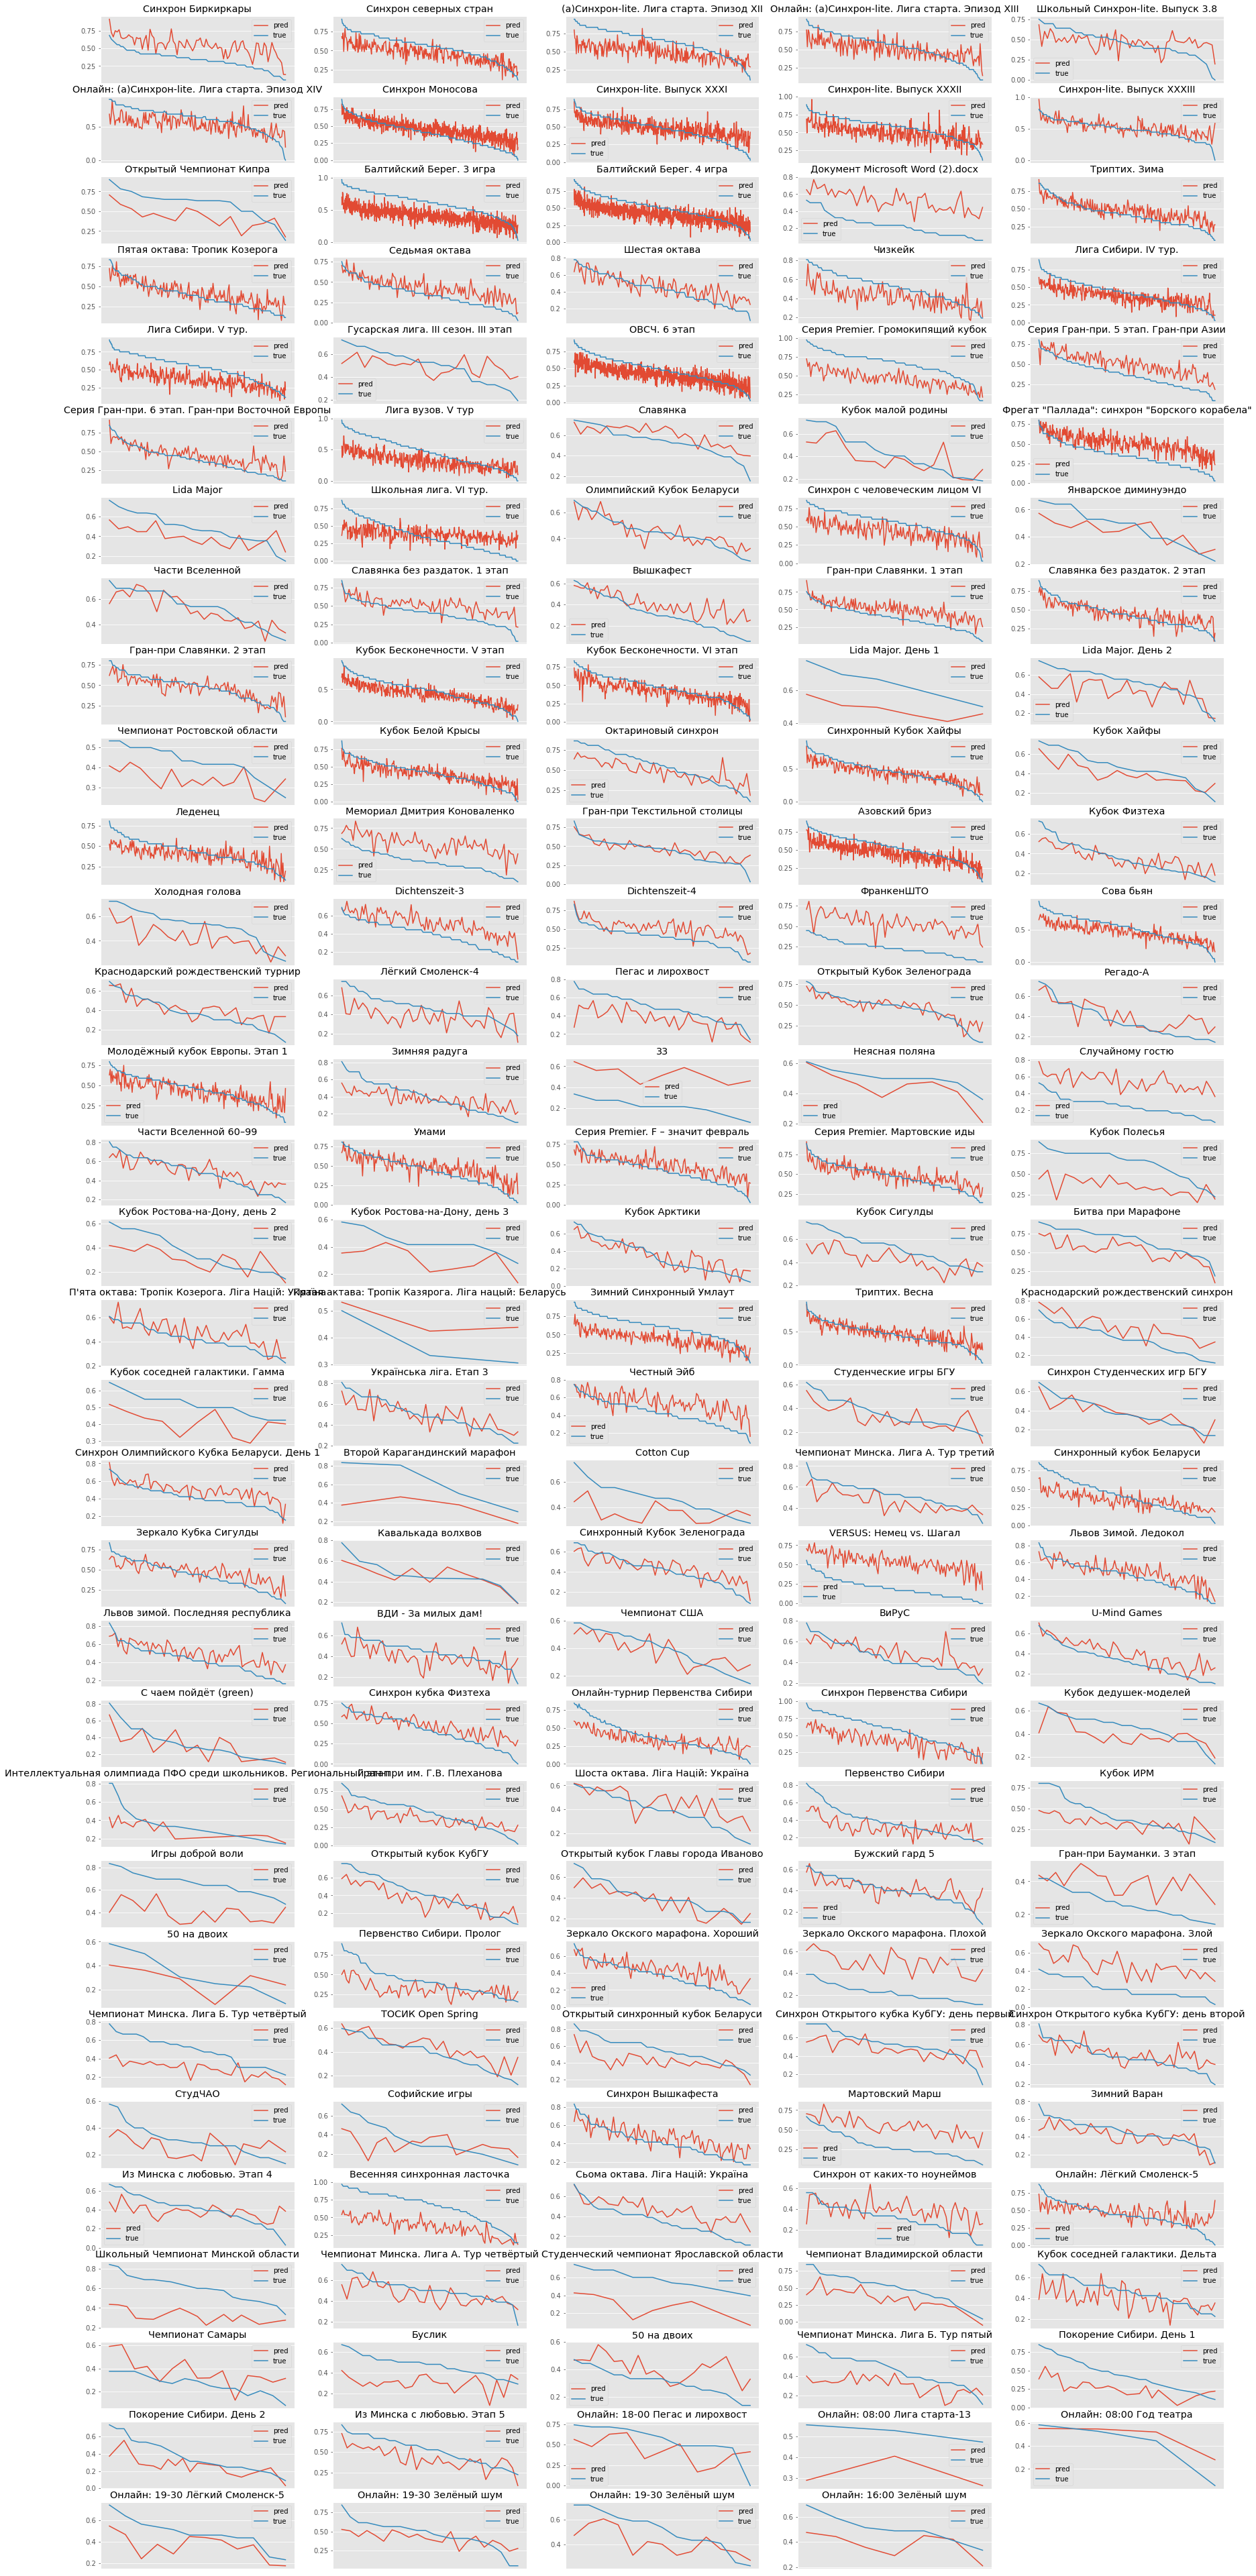

In [ ]:
# сводная тестовая табличка с графиками
res_tables = {}
fig = plt.figure(figsize=(30, 70))
for i, tour in enumerate(X_test_df):
  res_tables[tour] = pd.DataFrame(columns=['linreg_pred', 'true'], index=X_test_df[tour].index)
  res_tables[tour]['linreg_pred'] = preds[tour]
  res_tables[tour]['true'] = y_test_df[tour]
  ax = plt.subplot(32, 5,  i % len(X_test_df) + 1)
  ax.plot(res_tables[tour]['linreg_pred'], figure=fig, label='pred')
  ax.plot(res_tables[tour]['true'] , figure=fig, label='true')
  ax.set_title(tuple(tournaments[tournaments['id']==tour]['name'])[0])
  ax.set_xticks([])
  ax.legend()
plt.show()

In [ ]:
# полученные оценки на доли переведем в результаты турнира с помощью rankdata и посчитаем корреляции
y_test_rank_df = {}
preds_rank_df = {}
spearman_cors = np.zeros((len(X_test_df)))
kendall_cors = np.zeros((len(X_test_df)))
for i, tour in enumerate(X_test_df):
  y_test_rank_df[tour] = rankdata(y_test_df[tour])
  preds_rank_df[tour] = rankdata(preds[tour])
  spearman_cors[i] = spearmanr(y_test_rank_df[tour], preds_rank_df[tour])[0]
  kendall_cors[i] = kendalltau(y_test_rank_df[tour], preds_rank_df[tour])[0]

spearman_cors.mean(), kendall_cors.mean()

(0.7383889119430247, 0.5795082373288618)

In [ ]:
linreg.coef_

array([ 0.02701204,  0.02154774,  0.01677272,  0.01982213,  0.02512702,
        0.02934277,  0.01516976, -0.02937697, -0.00258659, -0.01011128,
        0.04207484,  0.11275228,  0.01367605, -0.03533607, -0.06612024,
       -0.02497203])

#EM

$
  p(x_{iq}) := p(x_{iq}|(rating_i, TourComplexity, Team) = \sigma((\sum_{j \in team} p(x_{jq}) + TourComplexity) 
$ 

$ x_{iq} $ скрытые, т.е. не знаем, кто именно ответил на вопрос 

$ x_{iq} $ инициализируем по команде: если она ответила на вопрос $q$, то оставим 1 из mask примерно у половины игроков(заменим половину 1 нулями в поле mask в повопросном датасете)

те $ x_{iq} $, которые остались = 1, в первом приближении добавим в one-hot у всей команды = 1, на следующих итерациях будем добавлять вероятности ответов участников, которые больше threshold=0.5

обучим logit (M-шаг) 

посчитаем новые $p(x_{iq})$ с помощью него

распределим их по командам в датасете 

repeat





In [ ]:
list(results_train_df[4772].index + 2)

In [23]:
for idx in results_train_df:
  if 'type' in results_train_df[idx].columns:
    results_train_df[idx].drop(columns=['type', 'class'], inplace=True)

In [31]:
# добавим в results_train_df id команд
# номера вопросов добавим в explode
id = 0
teams = {}
for idx in results_train_df:
  tour = results_train_df[idx]
  results_train_df[idx]['tour_id'] = np.ones((len(results_train_df[idx])), dtype=int) * idx
  tour['team_id'] = np.array(tour.index + id)
  id += len(tour.index)
  for command in tour.index:
    team = tour.iloc[command]
    teams[team['team_id']] = team['teamMembers']


In [25]:
results_train_df.keys()

dict_keys([4772, 4973, 4974, 4975, 5000, 5008, 5009, 5010, 5011, 5012, 5013, 5021, 5025, 5042, 5052, 5053, 5055, 5056, 5060, 5061, 5065, 5071, 5074, 5078, 5083, 5097, 5098, 5103, 5108, 5109, 5110, 5111, 5112, 5119, 5128, 5129, 5130, 5141, 5154, 5155, 5156, 5159, 5161, 5162, 5163, 5179, 5185, 5186, 5187, 5188, 5204, 5205, 5206, 5217, 5218, 5251, 5266, 5267, 5274, 5275, 5276, 5280, 5284, 5285, 5298, 5303, 5306, 5307, 5310, 5312, 5313, 5314, 5320, 5322, 5324, 5325, 5331, 5332, 5333, 5334, 5338, 5343, 5350, 5354, 5358, 5360, 5361, 5362, 5363, 5364, 5366, 5367, 5368, 5369, 5370, 5371, 5372, 5374, 5377, 5380, 5381, 5383, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5393, 5394, 5395, 5397, 5398, 5399, 5400, 5401, 5402, 5404, 5405, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452,

In [32]:
results_train_df[4974]

mask  \
0     111111111111111111111111111101111111   
1     111111111111111111111111111111111011   
2     111111111111110111111111111011111111   
3     111111111111111111111111111101111101   
4     111111111111111111111111111001111111   
...                                    ...   
1022  000000000001000000000000100000000000   
1023  000000001000000000000000000000000000   
1024  000000000000000000000001000000000000   
1025  000010000000000000000000000000000000   
1026  000000000000000000000000001000000000   

                                           teamMembers  team_id  tour_id  
0             [19411, 24290, 32979, 5195, 33806, 9680]     1258     4974  
1              [27822, 20691, 33620, 2421, 6482, 3843]     1259     4974  
2           [23737, 33509, 17296, 26818, 36035, 31848]     1260     4974  
3           [19992, 21952, 11179, 58842, 44650, 53426]     1261     4974  
4                     [176, 1562, 19568, 29973, 40822]     1262     4974  
...                                                ...      ...      ...  
1022                    [48637, 189310, 89407, 157612]     2280     4974  
1023                                  [169084, 192408]     2281     4974  
1024          [175969, 175971, 175972, 175973, 153064]     2282     4974  
1025                          [192387, 192388, 192389]     2283     4974  
1026  [192396, 192397, 192398, 192399, 192400, 192401]     2284     4974  

[1027 rows x 4 columns]

In [ ]:
len(teams)

73041

In [ ]:
results_train_df[6026]['mask'].apply(len) # я считаю за такое надо банить

0     100
1     100
2     100
3     112
4     112
5     112
6     100
7      98
8      98
9     112
10    112
11     98
12    100
13    100
14    112
15    100
16    112
17    112
18    100
19    112
Name: mask, dtype: int64

In [ ]:
results_train_df.pop(6026)

In [ ]:
results_train_df.pop(6090) # та же история

In [ ]:
almost_train_df = pd.DataFrame(columns=results_train_df[4772].columns)
q_num = 0
for i, idx in enumerate(results_train_df):
  print(i / len(results_train_df))
  tour = results_train_df[idx]
  tour['mask'] = tour['mask'].apply(lambda x: list(x))
  mask_len = len(tour.iloc[0]['mask'])
  len_tour = len(tour.index)
  q_nums = np.tile(np.arange(q_num, q_num + mask_len), len_tour)
  exploded = tour.explode('mask', ignore_index=True)
  exploded['q_num'] = q_nums
  q_num += mask_len
  almost_train_df = pd.concat([almost_train_df, exploded], axis=0, ignore_index=True)

In [36]:
id_to_del_x = almost_train_df['mask'][almost_train_df['mask']=='X'].index
almost_train_df.drop(index=id_to_del_x, inplace=True)

id_to_del_q = almost_train_df['mask'][almost_train_df['mask']=='?'].index
almost_train_df.drop(index=id_to_del_q, inplace=True)

In [37]:
almost_train_df.reset_index(drop=True, inplace=True)

In [ ]:
len(almost_train_df)

2890649

In [38]:
almost_train_df['mask'] = almost_train_df['mask'].astype(int)
almost_train_df['q_num'] = almost_train_df['q_num'].astype(int)

In [39]:
almost_train_df = almost_train_df.explode('teamMembers', ignore_index=True)

In [40]:
# mask это и есть скрытые переменные, вырежем примерно половину 1

almost_train_df['mask'] *= np.random.binomial(n=1, p=0.5, size=(len(almost_train_df['mask'])))

In [41]:
almost_train_df.head()

mask teamMembers team_id tour_id  q_num
0     0        6212       0    4772      0
1     1       18332       0    4772      0
2     0       18036       0    4772      0
3     1       22799       0    4772      0
4     1       15456       0    4772      0

In [ ]:
# модифицировать зависимости придется уже в батчах, тк память не резиновая

In [76]:
shuffled = shuffle(almost_train_df)

In [77]:
X = shuffled[['teamMembers', 'tour_id', 'team_id', 'q_num']]
y = shuffled['mask']

In [78]:
def get_batch(ind, batch_size, threshold=0.5):
  X_batch, y_batch = X.iloc[ind: ind + batch_size], y.iloc[ind: ind + batch_size].to_numpy().astype(np.float32)
  dummies_players = pd.DataFrame(enc_players.transform(X_batch['teamMembers'].to_numpy().reshape(-1, 1)).toarray() ,
                          columns=enc_players.categories_[0], index=X_batch.index)
  
  dummies_tours = pd.DataFrame(enc_tours.transform(X_batch['tour_id'].to_numpy().reshape(-1, 1)).toarray(),
                               columns=tour_dummies_cols, index=X_batch.index)

  X_batch = pd.concat([X_batch, dummies_players], axis=1)
  X_batch.drop(columns=['teamMembers'], inplace=True)
  X_batch = pd.concat([X_batch, dummies_tours], axis=1)
  X_batch.drop(columns=['tour_id'], inplace=True)

  batch = shuffled.iloc[ind: ind + batch_size]
  batch_heroes = batch[batch['mask'] >= threshold]         # ответившими считаем тех, у кого вероятность ответить больше threshold
  for question in batch_heroes['q_num'].unique():
    question_heroes = batch_heroes[batch_heroes['q_num']==question]
    for team in question_heroes['team_id'].unique():
      team_question_heroes = question_heroes[question_heroes['team_id']==team]
      for hero in team_question_heroes['teamMembers']:
        X_batch.loc[(X_batch['team_id']==team) & (X_batch['q_num']==question), hero] = float(team_question_heroes['mask'][team_question_heroes['teamMembers']==hero])

  X_batch.drop(columns=['team_id', 'q_num'], inplace=True)
  return X_batch, y_batch

In [69]:
X_batch, y_batch = get_batch(0, 2000)
X_batch.sum(axis=1)

0       6.0
1       5.0
2       6.0
3       5.0
4       5.0
       ... 
1995    2.0
1996    2.0
1997    2.0
1998    2.0
1999    2.0
Length: 2000, dtype: float64

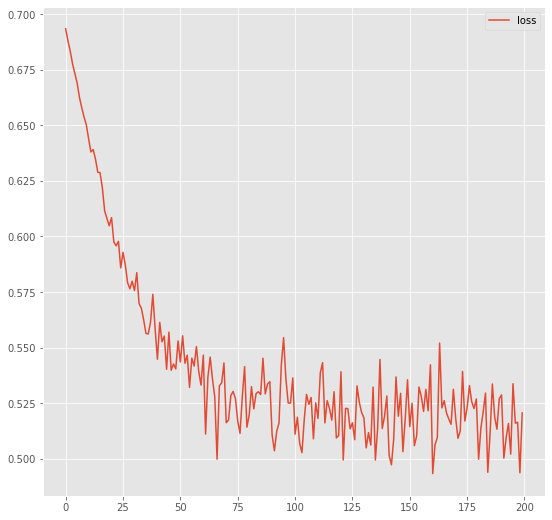

current loss: 0.5206184


In [80]:
model = nn.Sequential(
    nn.Linear(in_features=len(enc_players.categories_[0]) + len(tour_dummies_cols), out_features=1)
)
crit = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-2)
model.to(device)

losses = []
batch_size = 2048
n_iter = 200 

model.train()

ind = 0
for _ in range(n_iter):
  X_batch, y_batch = get_batch(ind, batch_size)
  
  
  X_batch = X_batch.to_numpy().astype(np.float32)
  X_batch_tensor, y_batch_tensor = torch.from_numpy(X_batch).to(device), torch.from_numpy(y_batch.reshape((-1, 1))).to(device)

  optim.zero_grad()

  logits = model(X_batch_tensor)
  loss = crit(logits, y_batch_tensor)
  losses.append(loss.data.cpu().detach().numpy())
  loss.backward()

  optim.step()

  ind += batch_size

  clear_output(True)
  plt.figure(figsize=(9, 9))
  plt.plot(losses, label='loss')
  plt.legend()
  plt.show()
  print('current loss:', losses[-1])




In [81]:
weights = model[0].weight.data.cpu().detach().numpy()

In [82]:
weights.shape

(1, 54621)

In [83]:
len(enc_players.categories_[0])

53972

In [84]:
#{id: вес игрока из регрессии}
players_scores = dict(zip(enc_players.categories_[0], weights.reshape((-1))))

In [85]:
players_scores[4271]

-0.069359146

In [ ]:
#обучим логрег для предсказания результатов 

In [ ]:
# пересчитаем скрытые переменные
model.eva()